In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

user_df = pd.read_csv('/content/drive/MyDrive/비트나인/R&D/GCMC/Book/Raw_Data/Users.csv')
book_df = pd.read_csv('/content/drive/MyDrive/비트나인/R&D/GCMC/Book/Raw_Data/Books.csv')
relation_df = pd.read_csv('/content/drive/MyDrive/비트나인/R&D/GCMC/Book/Raw_Data/Ratings.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# **Data Preprocessing**

## **User Data**

In [ ]:
#location 컬럼 문자열 전처리

def modify_location(loc_str):
    loc_list = loc_str.replace("n/a","").replace("/","").replace("  "," ").split(",")
    location = ""
    for loc in loc_list:
         non_space_loc = loc.replace(" ","")
         if len(non_space_loc) >= 1 and non_space_loc[0].isalpha():
              if loc != loc_list[-1]:
                    loc = loc.strip() + ","
                    location += loc
              else:
                   location += loc.strip()
    return location

In [ ]:
user_df['Location'] = user_df['Location'].apply(modify_location)
user_df

,User-ID,Location,Age
0,1,"nyc,new york,usa",NaN
1,2,"stockton,california,usa",18.0
2,3,"moscow,yukon territory,russia",NaN
3,4,"porto,v.n.gaia,portugal",17.0
4,5,"farnborough,hants,united kingdom",NaN
...,...,...,...
278853,278854,"portland,oregon,usa",NaN
278854,278855,"tacoma,washington,united kingdom",50.0
278855,278856,"brampton,ontario,canada",NaN
278856,278857,"knoxville,tennessee,usa",NaN


In [ ]:
user_df = user_df.replace(r'^\s*$', np.NaN, regex=True)
user_df

,User-ID,Location,Age
0,1,"nyc,new york,usa",NaN
1,2,"stockton,california,usa",18.0
2,3,"moscow,yukon territory,russia",NaN
3,4,"porto,v.n.gaia,portugal",17.0
4,5,"farnborough,hants,united kingdom",NaN
...,...,...,...
278853,278854,"portland,oregon,usa",NaN
278854,278855,"tacoma,washington,united kingdom",50.0
278855,278856,"brampton,ontario,canada",NaN
278856,278857,"knoxville,tennessee,usa",NaN


In [ ]:
user_df.isnull().sum()

User-ID          0
Location        92
Age         110762
dtype: int64

In [ ]:
user_df.loc[user_df['Location'].isnull()|user_df['Age'].isnull()]

,User-ID,Location,Age
0,1,"nyc,new york,usa",NaN
2,3,"moscow,yukon territory,russia",NaN
4,5,"farnborough,hants,united kingdom",NaN
6,7,"washington,dc,usa",NaN
7,8,"timmins,ontario,canada",NaN
...,...,...,...
278849,278850,"sergnano,lombardia,italy",NaN
278853,278854,"portland,oregon,usa",NaN
278855,278856,"brampton,ontario,canada",NaN
278856,278857,"knoxville,tennessee,usa",NaN


In [ ]:
#Location이나 Age가 NULL인 경우를 제외한 최종 데이터셋

User = user_df.drop(user_df.loc[user_df['Location'].isnull()|user_df['Age'].isnull()].index, axis=0)
User

,User-ID,Location,Age
1,2,"stockton,california,usa",18.0
3,4,"porto,v.n.gaia,portugal",17.0
5,6,"santa monica,california,usa",61.0
9,10,"albacete,wisconsin,spain",26.0
10,11,"melbourne,victoria,australia",14.0
...,...,...,...
278848,278849,"georgetown,ontario,canada",23.0
278850,278851,"dallas,texas,usa",33.0
278851,278852,"brisbane,queensland,australia",32.0
278852,278853,"stranraer,united kingdom",17.0


In [ ]:
User.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168056 entries, 1 to 278854
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   168056 non-null  int64  
 1   Location  168056 non-null  object 
 2   Age       168056 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ MB


## **Book Data**

In [ ]:
book_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [ ]:
Book = book_df.copy()
Book.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [ ]:
#출판연도가 0인 값 삭제
Book[['Book-Author','Publisher','Image-URL-L']] = book_df[['Book-Author','Publisher','Image-URL-L']].fillna('unknown')
Book

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [ ]:
#출판연도가 0인 값은 삭제
Book = Book.drop(Book.loc[(Book['Year-Of-Publication']==0)|(Book['Year-Of-Publication']=='0')].index, axis=0)
Book

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [ ]:
#출판연도에 string 값이 들어가 있음
err = [x for x in Book['Year-Of-Publication'] if len(str(x)) != 4]
err

['DK Publishing Inc', 'Gallimard', 'DK Publishing Inc']

In [ ]:
#값이 밀려들어가있음
Book.loc[Book['Year-Of-Publication'] == 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,unknown
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,unknown


In [ ]:
#밀린 레코드 수정
#ISBN '078946697X'
Book.loc[Book['ISBN'] == '078946697X','Image-URL-L'] = Book.loc[Book['ISBN'] == '078946697X','Image-URL-M']
Book.loc[Book['ISBN'] == '078946697X','Image-URL-M'] = Book.loc[Book['ISBN'] == '078946697X','Image-URL-S']
Book.loc[Book['ISBN'] == '078946697X','Image-URL-S'] = Book.loc[Book['ISBN'] == '078946697X','Publisher']
Book.loc[Book['ISBN'] == '078946697X','Year-Of-Publication'] = 2000
Book.loc[Book['ISBN'] == '078946697X','Book-Author'] = "Michael Teitelbaum"
Book.loc[Book['ISBN'] == '078946697X','Publisher'] = "DK Publishing Inc"
Book.loc[Book['ISBN'] == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#rechecking
Book.loc[Book['ISBN'] == '078946697X',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...


In [ ]:
#ISBN '0789466953'
Book.loc[Book['ISBN'] == '0789466953','Image-URL-L'] = Book.loc[Book['ISBN'] == '0789466953','Image-URL-M']
Book.loc[Book['ISBN'] == '0789466953','Image-URL-M'] = Book.loc[Book['ISBN'] == '0789466953','Image-URL-S']
Book.loc[Book['ISBN'] == '0789466953','Image-URL-S'] = Book.loc[Book['ISBN'] == '0789466953','Publisher']
Book.loc[Book['ISBN'] == '0789466953','Year-Of-Publication'] = 2000
Book.loc[Book['ISBN'] == '0789466953','Book-Author'] = "James Buckley"
Book.loc[Book['ISBN'] == '0789466953','Publisher'] = "DK Publishing Inc"
Book.loc[Book['ISBN'] == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#rechecking
Book.loc[Book['ISBN'] == '0789466953',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...


In [ ]:
#ISBN '2070426769'
Book.loc[Book['ISBN'] == '2070426769','Image-URL-L'] = Book.loc[Book['ISBN'] == '2070426769','Image-URL-M']
Book.loc[Book['ISBN'] == '2070426769','Image-URL-M'] = Book.loc[Book['ISBN'] == '2070426769','Image-URL-S']
Book.loc[Book['ISBN'] == '2070426769','Image-URL-S'] = Book.loc[Book['ISBN'] == '2070426769','Publisher']
Book.loc[Book['ISBN'] == '2070426769','Year-Of-Publication'] = 2003
Book.loc[Book['ISBN'] == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
Book.loc[Book['ISBN'] == '2070426769','Publisher'] = "Gallimard"
Book.loc[Book['ISBN'] == '2070426769','Book-Title'] ="Peuple du ciel, suivi de 'Les Bergers"

#rechecking
Book.loc[Book['ISBN'] == '2070426769',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...


In [ ]:
Book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266742 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 266742 non-null  object
 1   Book-Title           266742 non-null  object
 2   Book-Author          266742 non-null  object
 3   Year-Of-Publication  266742 non-null  object
 4   Publisher            266742 non-null  object
 5   Image-URL-S          266742 non-null  object
 6   Image-URL-M          266742 non-null  object
 7   Image-URL-L          266742 non-null  object
dtypes: object(8)
memory usage: 18.3+ MB


## **Rating Data**

In [ ]:
relation_df

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [ ]:
#User, Data 전처리 후 제거된 ID는 Rating에서도 제거해주어야 함
User_index = list(set(User['User-ID']))
Book_index = list(set(Book['ISBN']))

relation_df = relation_df.loc[(relation_df['User-ID'].isin(User_index))&(relation_df['ISBN'].isin(Book_index))]
relation_df

,User-ID,ISBN,Book-Rating
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
16,276747,0060517794,9
...,...,...,...
1149756,276690,0590581066,0
1149757,276690,0590907301,0
1149776,276706,0679447156,0
1149777,276709,0515107662,10


In [ ]:
relation_df['Book-Rating'].value_counts()

0     477365
8      63783
10     53198
7      44785
9      44588
5      27321
6      21106
4       5007
3       3277
2       1530
1        870
Name: Book-Rating, dtype: int64

In [ ]:
#평점이 0인 경우 필터링
relation_df = relation_df.drop(relation_df.loc[relation_df['Book-Rating']==0].index, axis=0)
relation_df

,User-ID,ISBN,Book-Rating
3,276729,052165615X,3
4,276729,0521795028,6
16,276747,0060517794,9
19,276747,0671537458,9
20,276747,0679776818,8
...,...,...,...
1149647,276681,0446677450,8
1149649,276681,0609806491,7
1149651,276681,1931333246,10
1149777,276709,0515107662,10


In [ ]:
#최소 10개 이상의 책에 평점을 남긴 유저 추출을 위한 데이터프레임 생성
more_than_ten_books = pd.DataFrame(relation_df.groupby(by = 'User-ID').count())
more_than_ten_books

,ISBN,Book-Rating
User-ID,,
19,1,1
42,1,1
44,1,1
51,1,1
56,2,2
...,...,...
278844,2,2
278846,1,1
278849,1,1


In [ ]:
#1권의 도서에만 평점을 매긴 유저는 총 45382명
more_than_ten_books['Book-Rating'].value_counts()

1      21159
2       5219
3       2854
4       1795
5       1311
       ...  
522        1
203        1
235        1
267        1
255        1
Name: Book-Rating, Length: 261, dtype: int64

In [ ]:
#10권 이상에 평점을 매긴 유저 추출
more_than_ten_books.loc[more_than_ten_books['Book-Rating']>=10]

,ISBN,Book-Rating
User-ID,,
242,20,20
254,57,57
388,17,17
392,12,12
503,15,15
...,...,...
278356,36,36
278390,12,12
278554,12,12


In [ ]:
#최소 10개 이상의 유저와 연결된 책 추출을 위한 데이터프레임 생성
more_than_ten_users = pd.DataFrame(relation_df.groupby(by = 'ISBN').count())
more_than_ten_users

,User-ID,Book-Rating
ISBN,,
0000913154,1,1
0001047973,1,1
000104799X,2,2
0001048082,1,1
0001056107,2,2
...,...,...
B0001FZGBC,1,1
B0001FZGPI,1,1
B0001FZGRQ,1,1


In [ ]:
more_than_ten_users['Book-Rating'].value_counts()

1      81420
2      16932
3       6730
4       3474
5       2119
       ...  
137        1
147        1
160        1
84         1
219        1
Name: Book-Rating, Length: 139, dtype: int64

In [ ]:
more_than_ten_users.loc[more_than_ten_users['Book-Rating']>=10]

,User-ID,Book-Rating
ISBN,,
0007110928,21,21
0007154615,10,10
000716226X,10,10
0020198817,11,11
0020198906,10,10
...,...,...
8804342838,10,10
8806142100,12,12
8806143042,12,12


# **Final Data**

## **1) 10권 이상에 평점을 남긴 유저 Index&&10명 이상의 유저와 연결된 도서 Index**

In [ ]:
mtt_users = list(more_than_ten_books.loc[more_than_ten_books['Book-Rating']>=10].index) #User-ID

In [ ]:
rating = relation_df.copy()
rating

,User-ID,ISBN,Book-Rating
3,276729,052165615X,3
4,276729,0521795028,6
16,276747,0060517794,9
19,276747,0671537458,9
20,276747,0679776818,8
...,...,...,...
1149647,276681,0446677450,8
1149649,276681,0609806491,7
1149651,276681,1931333246,10
1149777,276709,0515107662,10


In [ ]:
#10권 이상에 평점을 매긴 유저로 rating 데이터 필터링 후 10명이상의 유저와 연결된 도서 ID 추출
mtt_mtt_book = rating.loc[rating['User-ID'].isin(mtt_users)].groupby('ISBN').count().sort_values(by='Book-Rating')
mtt_mtt_book = mtt_mtt_book.loc[mtt_mtt_book['Book-Rating']>=10]
mtt_books = mtt_mtt_book.index

In [ ]:
mtt_mtt_book #이름 진짜 구리다

,User-ID,Book-Rating
ISBN,,
0380719185,10,10
0345253736,10,10
0515134384,10,10
0440136482,10,10
0399142282,10,10
...,...,...
043935806X,139,139
0971880107,140,140
059035342X,144,144


In [ ]:
final_rating = rating.loc[(rating['User-ID'].isin(mtt_users))&(rating['ISBN'].isin(mtt_books))]
final_rating

,User-ID,ISBN,Book-Rating
133,276822,0060096195,10
145,276822,0786817070,10
211,276847,3551551685,10
413,276925,002542730X,10
429,276925,0385504209,8
...,...,...,...
1149639,276681,0060809833,10
1149640,276681,0060930535,9
1149641,276681,0060938455,9
1149646,276681,0399144463,8


In [ ]:
#아이디 정수 매핑
Rating = final_rating.copy()

t_book_id_map = dict(zip(mtt_books,range(len(mtt_books))))

Rating['ISBN'] = Rating['ISBN'].apply(t_book_id_map.get)

In [ ]:
Rating

,User-ID,ISBN,Book-Rating
133,276822,1802,10
145,276822,1999,10
211,276847,147,10
413,276925,1947,10
429,276925,2158,8
...,...,...,...
1149639,276681,1097,10
1149640,276681,2111,9
1149641,276681,2116,9
1149646,276681,1864,8


In [ ]:
Rating['Book-Rating'].value_counts()

8     10657
10    10532
9      8581
7      6804
5      3316
6      2955
4       671
3       443
2       223
1       114
Name: Book-Rating, dtype: int64

In [ ]:
len(set(Rating['User-ID'])) #num_users

4353

In [ ]:
len(set(Rating['ISBN'])) #num_items

2160

In [ ]:
Rating.to_csv('Processing_Data/Ratings.csv',index=None)

FileNotFoundError: ignored

# **Feature Engineering**

In [ ]:
final_user_idx = list(set(final_rating['User-ID']))
final_book_idx = list(set(final_rating['ISBN']))

In [ ]:
len(final_user_idx)

4353

In [ ]:
Users = User.loc[User['User-ID'].isin(final_user_idx)] #10권 이상에 평점을 남긴 유저의 정보
Users.index = range(len(Users))
Users

,User-ID,Location,Age
0,242,"neuffen,baden-wuerttemberg,germany",37.0
1,254,"minneapolis,minnesota,usa",24.0
2,388,"nashville,tennessee,usa",35.0
3,503,"el centro,california,usa",40.0
4,505,"washington,dc,usa",51.0
...,...,...,...
4348,278356,"lakeland,tennessee,usa",57.0
4349,278390,"elburn,illinois,usa",35.0
4350,278554,"takasaki,gunma,japan",22.0
4351,278843,"pismo beach,california,usa",28.0


In [ ]:
#Users.to_csv('User_Features.csv', index=False)

#User Feature 파일로 크롤링한 데이터 불러오기
Users = pd.read_csv('Users_Location.csv')
Users

,Location,Age,Latitude,Longitude
0,"neuffen,baden-wuerttemberg,germany",37.0,48.554141,9.291279
1,"minneapolis,minnesota,usa",24.0,44.970676,-93.331518
2,"nashville,tennessee,usa",35.0,36.186314,-87.065432
3,"el centro,california,usa",40.0,32.786142,-115.591547
4,"washington,dc,usa",51.0,38.893671,-77.154660
...,...,...,...,...
4348,"lakeland,tennessee,usa",57.0,35.261026,-89.798739
4349,"elburn,illinois,usa",35.0,41.883423,-88.499794
4350,"takasaki,gunma,japan",22.0,36.340624,138.605873
4351,"pismo beach,california,usa",28.0,35.147692,-120.729533


In [ ]:
#U_ID 빠진 부분 추가
Users['U_ID'] =  list(User['User-ID'][User['User-ID'].isin(final_user_idx)])
Users

,Location,Age,Latitude,Longitude,U_ID
0,"neuffen,baden-wuerttemberg,germany",37.0,48.554141,9.291279,242
1,"minneapolis,minnesota,usa",24.0,44.970676,-93.331518,254
2,"nashville,tennessee,usa",35.0,36.186314,-87.065432,388
3,"el centro,california,usa",40.0,32.786142,-115.591547,503
4,"washington,dc,usa",51.0,38.893671,-77.154660,505
...,...,...,...,...,...
4348,"lakeland,tennessee,usa",57.0,35.261026,-89.798739,278356
4349,"elburn,illinois,usa",35.0,41.883423,-88.499794,278390
4350,"takasaki,gunma,japan",22.0,36.340624,138.605873,278554
4351,"pismo beach,california,usa",28.0,35.147692,-120.729533,278843


In [ ]:
Books = Book.loc[Book['ISBN'].isin(final_book_idx)] #10명 이상의 유저와 연결된 도서의 정보
Books.index = range(len(Books))
Books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...
1,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...
2,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
3,0345402871,Airframe,Michael Crichton,1997,Ballantine Books,http://images.amazon.com/images/P/0345402871.0...,http://images.amazon.com/images/P/0345402871.0...,http://images.amazon.com/images/P/0345402871.0...
4,0345417623,Timeline,MICHAEL CRICHTON,2000,Ballantine Books,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...
...,...,...,...,...,...,...,...,...
2155,0553287346,Well-Schooled in Murder,Elizabeth George,1991,Bantam Books,http://images.amazon.com/images/P/0553287346.0...,http://images.amazon.com/images/P/0553287346.0...,http://images.amazon.com/images/P/0553287346.0...
2156,0399152288,R is for Ricochet,Sue Grafton,2004,Putnam Publishing Group,http://images.amazon.com/images/P/0399152288.0...,http://images.amazon.com/images/P/0399152288.0...,http://images.amazon.com/images/P/0399152288.0...
2157,0439425220,Harry Potter and the Chamber of Secrets Postca...,J. K. Rowling,2002,Scholastic,http://images.amazon.com/images/P/0439425220.0...,http://images.amazon.com/images/P/0439425220.0...,http://images.amazon.com/images/P/0439425220.0...
2158,1551668017,Firebrand (Mira Historical Romance),Susan Wiggs,2001,Mira,http://images.amazon.com/images/P/1551668017.0...,http://images.amazon.com/images/P/1551668017.0...,http://images.amazon.com/images/P/1551668017.0...


## **Image&Text Embedding**

In [ ]:
pip install -U sentence-transformers

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: urllib3<1.27,>=1.21.1 in c:\users\samsung\anaconda3\lib\site-packages (from requests->transformers<5.0.0,>=4.6.0->sentence-transformers) (1.26.4)



In [ ]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image

#Load CLIP model
model = SentenceTransformer('clip-ViT-B-32')

In [ ]:
#이미지 리스트 생성

import requests
import numpy as np
from io import BytesIO
from PIL import Image

def return_img(url):
  # request.get 요청
  res = requests.get(url)
  #Img open
  img = Image.open(BytesIO(res.content))
  return img

black = np.zeros((160,96,3), dtype=np.uint8)
black_image = Image.fromarray(black)
black_num = 0
img_list = []
for idx, im_link in enumerate(Books['Image-URL-M']):
  try:
    img = return_img(im_link)
    img_list.append(img)
  except:  #이미지 파일이 존재하지 않는 경우 빈 검정 이미지 append
    black_num += 1
    img_list.append(black_image)
    pass

In [ ]:
# (1,1) 이미지의 경우 임베딩이 되지 않으므로 검정 이미지를 대신 append하고 전체 이미지 사이즈 통일.
error_list= []
for idx, img in enumerate(img_list):
  if img.size == (1, 1):
    error_list.append(idx)

im_lst = []

for idx, img in enumerate(img_list):
  if idx in error_list:
    im_lst.append(black_image)
  else:
    img = img.resize((96,160))
    im_lst.append(img)

In [ ]:
img_emb = model.encode(im_lst)

C:\Users\SAMSUNG\anaconda3\lib\site-packages\transformers\feature_extraction_utils.py:158: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:201.)
  tensor = as_tensor(value)


In [ ]:
img_emb

array([[-0.02058567,  0.16754404, -0.11122833, ...,  0.5170045 ,
         0.18350036,  0.6769894 ],
       [ 0.3352897 ,  0.21198715,  0.6510574 , ...,  0.63000786,
        -0.6100293 ,  0.42322814],
       [ 0.0711978 ,  0.04282427, -0.19698976, ...,  0.87035525,
         0.00527856, -0.11647498],
       ...,
       [-0.54907084,  0.13936469,  0.63939416, ...,  0.1554597 ,
        -0.12406386,  0.15945613],
       [-0.12731653,  0.47627395,  0.149102  , ...,  0.37500006,
         0.09379201, -0.24962944],
       [ 0.06385779, -0.02820906,  0.12176271, ...,  0.72772014,
        -0.56885946,  0.17860205]], dtype=float32)

In [ ]:
#책 제목 임베딩

title_emb = model.encode(list(Books['Book-Title']))

In [ ]:
title_emb

array([[-0.2769001 ,  0.1958188 , -0.2195787 , ..., -0.30977568,
         0.10190254,  0.05066044],
       [ 0.3506656 , -0.05085524,  0.4166009 , ..., -0.18010232,
        -0.11443955,  0.06879923],
       [-0.3882744 , -0.24136677,  0.11234955, ...,  0.11406839,
        -0.10621186, -0.00419608],
       ...,
       [ 0.26624846, -0.11621001,  0.01337515, ...,  0.2801108 ,
         0.03944358, -0.09136773],
       [ 0.1177213 , -0.2612506 ,  0.40912855, ...,  0.36134124,
        -0.06342463,  0.02646904],
       [ 0.0593262 ,  0.09225012, -0.12548457, ...,  0.02474925,
        -0.22853205, -0.18572873]], dtype=float32)

In [ ]:
Book_Features = pd.DataFrame()

Book_Features['B_ID'] = Books["ISBN"].apply(t_book_id_map.get)
Book_Features['Pub_year'] = Books['Year-Of-Publication'].astype('int')
Book_Features['Title'] = list(title_emb)
Book_Features['Image'] = list(img_emb)
Book_Features

,B_ID,Pub_year,Title,Image
0,2088,1999,"[-0.2769001, 0.1958188, -0.2195787, 0.27876914...","[-0.020585671, 0.16754404, -0.11122833, 0.1399..."
1,1969,1994,"[0.3506656, -0.05085524, 0.4166009, 0.02828306...","[0.3352897, 0.21198715, 0.6510574, -0.41256708..."
2,2156,2004,"[-0.3882744, -0.24136677, 0.112349555, 0.29757...","[0.0711978, 0.04282427, -0.19698976, -0.155085..."
3,1813,1997,"[0.06277868, -0.08362389, 0.02368163, 0.075980...","[0.5265349, 0.30027634, -0.12036969, -0.485647..."
4,2099,2000,"[-0.03809901, -0.20433983, -0.43128937, 0.0425...","[0.3097492, 0.39387232, -0.46737826, -0.334915..."
...,...,...,...,...
2155,37,1991,"[0.014855713, 0.13702229, 0.11367734, -0.28720...","[0.060112655, 0.14815047, -0.051055335, 0.3284..."
2156,372,2004,"[0.38549036, -0.22046293, -0.08458388, -0.0190...","[-0.033187397, 0.3197887, 0.10201883, -0.02415..."
2157,1403,2002,"[0.26624846, -0.116210006, 0.01337515, -0.2204...","[-0.54907084, 0.13936469, 0.63939416, 0.334078..."
2158,794,2001,"[0.117721304, -0.2612506, 0.40912855, -0.11193...","[-0.12731653, 0.47627395, 0.149102, 0.22809894..."


## **Categorical Variable Embedding**

In [ ]:
Cat_Features = pd.DataFrame()
Cat_Features['Author'] = Books["Book-Author"]
Cat_Features['Publisher'] = Books["Publisher"]

Cat_Features

,Author,Publisher
0,John Grisham,Dell
1,Toni Morrison,Plume
2,Rich Shapero,Too Far
3,Michael Crichton,Ballantine Books
4,MICHAEL CRICHTON,Ballantine Books
...,...,...
2155,Elizabeth George,Bantam Books
2156,Sue Grafton,Putnam Publishing Group
2157,J. K. Rowling,Scholastic
2158,Susan Wiggs,Mira


In [ ]:
pip install category_encoders

In [ ]:
from category_encoders import BinaryEncoder

unique_author = list(set(Books['Book-Author']))
unique_pub = list(set(Books['Publisher']))

#Create the Dataframe
author_data=pd.DataFrame({'Author': unique_author})
pub_data=pd.DataFrame({'Publisher': unique_pub})
#Create object for binary encoding
author_encoder= BinaryEncoder(cols=['Author'],return_df=True)
pub_encoder= BinaryEncoder(cols=['Publisher'],return_df=True)

#Fit and Transform Data
author_data_encoded=author_encoder.fit_transform(author_data)
pub_data_encoded=pub_encoder.fit_transform(pub_data)

In [ ]:
author_data['ce_Author'] = [list(author_data_encoded.iloc[x]) for x in range(len(author_data_encoded))]
author_data

,Author,ce_Author
0,Harper Lee,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]"
1,Rosie Daley,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"
2,Ha Jin,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1]"
3,J.D. Salinger,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
4,Daphne Du Maurier,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 1]"
...,...,...
806,M. J. Rose,"[1, 1, 0, 0, 1, 0, 0, 1, 1, 1]"
807,Marian Keyes,"[1, 1, 0, 0, 1, 0, 1, 0, 0, 0]"
808,Shel Silverstein,"[1, 1, 0, 0, 1, 0, 1, 0, 0, 1]"
809,CHRISTOPHER REICH,"[1, 1, 0, 0, 1, 0, 1, 0, 1, 0]"


In [ ]:
pub_data['ce_Publisher'] = [list(pub_data_encoded.iloc[x]) for x in range(len(pub_data_encoded))]
pub_data

,Publisher,ce_Publisher
0,Multnomah,"[0, 0, 0, 0, 0, 0, 0, 1]"
1,Jove Books,"[0, 0, 0, 0, 0, 0, 1, 0]"
2,Delacorte Books for Young Readers,"[0, 0, 0, 0, 0, 0, 1, 1]"
3,Red Dress Ink,"[0, 0, 0, 0, 0, 1, 0, 0]"
4,Signet Book,"[0, 0, 0, 0, 0, 1, 0, 1]"
...,...,...
243,Spectra Books,"[1, 1, 1, 1, 0, 1, 0, 0]"
244,Scholastic Paperbacks,"[1, 1, 1, 1, 0, 1, 0, 1]"
245,Health Communications,"[1, 1, 1, 1, 0, 1, 1, 0]"
246,Avon Books,"[1, 1, 1, 1, 0, 1, 1, 1]"


In [ ]:
author_ce_map = dict(zip(list(author_data['Author']), list(author_data['ce_Author'])))
pub_ce_map = dict(zip(list(pub_data['Publisher']), list(pub_data['ce_Publisher'])))

Cat_Features['Author'] = Cat_Features['Author'].apply(author_ce_map.get)
Cat_Features['Publisher'] = Cat_Features['Publisher'].map(pub_ce_map.get)

Cat_Features

,Author,Publisher
0,"[0, 1, 0, 1, 0, 0, 1, 1, 0, 1]","[1, 1, 0, 0, 0, 0, 1, 0]"
1,"[0, 0, 0, 1, 1, 1, 1, 0, 1, 1]","[0, 0, 0, 1, 0, 1, 0, 0]"
2,"[1, 0, 0, 1, 1, 1, 0, 1, 0, 1]","[1, 1, 1, 1, 0, 0, 1, 1]"
3,"[1, 0, 1, 1, 0, 1, 0, 1, 1, 1]","[1, 0, 0, 1, 0, 1, 1, 0]"
4,"[0, 1, 1, 0, 0, 1, 1, 0, 1, 0]","[1, 0, 0, 1, 0, 1, 1, 0]"
...,...,...
2155,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0]","[0, 1, 0, 1, 1, 0, 1, 1]"
2156,"[1, 0, 0, 0, 1, 0, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 1, 1, 0]"
2157,"[1, 0, 1, 0, 1, 0, 0, 1, 1, 1]","[1, 0, 0, 0, 1, 1, 1, 0]"
2158,"[0, 0, 0, 0, 1, 1, 0, 0, 1, 1]","[1, 1, 0, 1, 1, 0, 1, 1]"


In [ ]:
Book_Features = pd.concat([Book_Features, Cat_Features], axis=1)

In [ ]:
#Final Feature Dataset

User_Features= Users[['U_ID','Age','Latitude','Longitude']]
User_Features

,U_ID,Age,Latitude,Longitude
0,242,37.0,48.554141,9.291279
1,254,24.0,44.970676,-93.331518
2,388,35.0,36.186314,-87.065432
3,503,40.0,32.786142,-115.591547
4,505,51.0,38.893671,-77.154660
...,...,...,...,...
4348,278356,57.0,35.261026,-89.798739
4349,278390,35.0,41.883423,-88.499794
4350,278554,22.0,36.340624,138.605873
4351,278843,28.0,35.147692,-120.729533


In [ ]:
Book_Features

,B_ID,Pub_year,Title,Image,Author,Publisher
0,2088,1999,"[-0.2769001, 0.1958188, -0.2195787, 0.27876914...","[-0.020585671, 0.16754404, -0.11122833, 0.1399...","[0, 1, 0, 1, 0, 0, 1, 1, 0, 1]","[1, 1, 0, 0, 0, 0, 1, 0]"
1,1969,1994,"[0.3506656, -0.05085524, 0.4166009, 0.02828306...","[0.3352897, 0.21198715, 0.6510574, -0.41256708...","[0, 0, 0, 1, 1, 1, 1, 0, 1, 1]","[0, 0, 0, 1, 0, 1, 0, 0]"
2,2156,2004,"[-0.3882744, -0.24136677, 0.112349555, 0.29757...","[0.0711978, 0.04282427, -0.19698976, -0.155085...","[1, 0, 0, 1, 1, 1, 0, 1, 0, 1]","[1, 1, 1, 1, 0, 0, 1, 1]"
3,1813,1997,"[0.06277868, -0.08362389, 0.02368163, 0.075980...","[0.5265349, 0.30027634, -0.12036969, -0.485647...","[1, 0, 1, 1, 0, 1, 0, 1, 1, 1]","[1, 0, 0, 1, 0, 1, 1, 0]"
4,2099,2000,"[-0.03809901, -0.20433983, -0.43128937, 0.0425...","[0.3097492, 0.39387232, -0.46737826, -0.334915...","[0, 1, 1, 0, 0, 1, 1, 0, 1, 0]","[1, 0, 0, 1, 0, 1, 1, 0]"
...,...,...,...,...,...,...
2155,37,1991,"[0.014855713, 0.13702229, 0.11367734, -0.28720...","[0.060112655, 0.14815047, -0.051055335, 0.3284...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0]","[0, 1, 0, 1, 1, 0, 1, 1]"
2156,372,2004,"[0.38549036, -0.22046293, -0.08458388, -0.0190...","[-0.033187397, 0.3197887, 0.10201883, -0.02415...","[1, 0, 0, 0, 1, 0, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 1, 1, 0]"
2157,1403,2002,"[0.26624846, -0.116210006, 0.01337515, -0.2204...","[-0.54907084, 0.13936469, 0.63939416, 0.334078...","[1, 0, 1, 0, 1, 0, 0, 1, 1, 1]","[1, 0, 0, 0, 1, 1, 1, 0]"
2158,794,2001,"[0.117721304, -0.2612506, 0.40912855, -0.11193...","[-0.12731653, 0.47627395, 0.149102, 0.22809894...","[0, 0, 0, 0, 1, 1, 0, 0, 1, 1]","[1, 1, 0, 1, 1, 0, 1, 1]"


In [ ]:
User_Features.to_csv("Processing_Data/non_scaling_user_features.csv", index=None)
Book_Features.to_csv("Processing_Data/non_scaling_book_features.csv", index=None)

## **Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Standardization 평균 0 / 분산 1
scaler = StandardScaler()
user_scaler = scaler.fit_transform(User_Features[['Age','Latitude','Longitude']])
book_scaler = scaler.fit_transform(Book_Features[['Pub_year']])

In [ ]:
num_user = pd.DataFrame(user_scaler, columns=['Age','Latitude','Longitude'])
num_user

,Age,Latitude,Longitude
0,0.079145,0.780431,1.322072
1,-0.867733,0.499821,-0.406526
2,-0.066529,-0.188058,-0.300979
3,0.297655,-0.454315,-0.781478
4,1.098860,0.023948,-0.134040
...,...,...,...
4348,1.535880,-0.260514,-0.347019
4349,-0.066529,0.258067,-0.325139
4350,-1.013407,-0.175974,3.500272
4351,-0.576386,-0.269389,-0.868023


In [ ]:
num_book = pd.DataFrame(book_scaler, columns=['Pub_year'])
num_book

,Pub_year
0,0.368464
1,-0.368464
2,1.105392
3,0.073693
4,0.515850
...,...
2155,-0.810621
2156,1.105392
2157,0.810621
2158,0.663235


In [ ]:
User_Features['Age'] = num_user['Age']
User_Features['Latitude'] = num_user['Latitude']
User_Features['Longitude'] = num_user['Longitude']

User_Features

<ipython-input-69-c9e438e08192>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  User_Features['Age'] = num_user['Age']
<ipython-input-69-c9e438e08192>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  User_Features['Latitude'] = num_user['Latitude']
<ipython-input-69-c9e438e08192>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,U_ID,Age,Latitude,Longitude
0,242,0.079145,0.780431,1.322072
1,254,-0.867733,0.499821,-0.406526
2,388,-0.066529,-0.188058,-0.300979
3,503,0.297655,-0.454315,-0.781478
4,505,1.098860,0.023948,-0.134040
...,...,...,...,...
4348,278356,1.535880,-0.260514,-0.347019
4349,278390,-0.066529,0.258067,-0.325139
4350,278554,-1.013407,-0.175974,3.500272
4351,278843,-0.576386,-0.269389,-0.868023


In [ ]:
Book_Features['Pub_year'] = num_book['Pub_year']
Book_Features

,B_ID,Pub_year,Title,Image,Author,Publisher
0,2088,0.368464,"[-0.2769001, 0.1958188, -0.2195787, 0.27876914...","[-0.020585671, 0.16754404, -0.11122833, 0.1399...","[0, 1, 0, 1, 0, 0, 1, 1, 0, 1]","[1, 1, 0, 0, 0, 0, 1, 0]"
1,1969,-0.368464,"[0.3506656, -0.05085524, 0.4166009, 0.02828306...","[0.3352897, 0.21198715, 0.6510574, -0.41256708...","[0, 0, 0, 1, 1, 1, 1, 0, 1, 1]","[0, 0, 0, 1, 0, 1, 0, 0]"
2,2156,1.105392,"[-0.3882744, -0.24136677, 0.112349555, 0.29757...","[0.0711978, 0.04282427, -0.19698976, -0.155085...","[1, 0, 0, 1, 1, 1, 0, 1, 0, 1]","[1, 1, 1, 1, 0, 0, 1, 1]"
3,1813,0.073693,"[0.06277868, -0.08362389, 0.02368163, 0.075980...","[0.5265349, 0.30027634, -0.12036969, -0.485647...","[1, 0, 1, 1, 0, 1, 0, 1, 1, 1]","[1, 0, 0, 1, 0, 1, 1, 0]"
4,2099,0.515850,"[-0.03809901, -0.20433983, -0.43128937, 0.0425...","[0.3097492, 0.39387232, -0.46737826, -0.334915...","[0, 1, 1, 0, 0, 1, 1, 0, 1, 0]","[1, 0, 0, 1, 0, 1, 1, 0]"
...,...,...,...,...,...,...
2155,37,-0.810621,"[0.014855713, 0.13702229, 0.11367734, -0.28720...","[0.060112655, 0.14815047, -0.051055335, 0.3284...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0]","[0, 1, 0, 1, 1, 0, 1, 1]"
2156,372,1.105392,"[0.38549036, -0.22046293, -0.08458388, -0.0190...","[-0.033187397, 0.3197887, 0.10201883, -0.02415...","[1, 0, 0, 0, 1, 0, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 1, 1, 0]"
2157,1403,0.810621,"[0.26624846, -0.116210006, 0.01337515, -0.2204...","[-0.54907084, 0.13936469, 0.63939416, 0.334078...","[1, 0, 1, 0, 1, 0, 0, 1, 1, 1]","[1, 0, 0, 0, 1, 1, 1, 0]"
2158,794,0.663235,"[0.117721304, -0.2612506, 0.40912855, -0.11193...","[-0.12731653, 0.47627395, 0.149102, 0.22809894...","[0, 0, 0, 0, 1, 1, 0, 0, 1, 1]","[1, 1, 0, 1, 1, 0, 1, 1]"


# **Dimensionality Reduction**

In [ ]:
import torch

#user와 book id를 제외한 뒤 텐서로 변형
user_to_tensor = torch.FloatTensor(User_Features.drop('U_ID',axis=1).values)
user_to_tensor

tensor([[ 0.0791,  0.7804,  1.3221],
        [-0.8677,  0.4998, -0.4065],
        [-0.0665, -0.1881, -0.3010],
        ...,
        [-1.0134, -0.1760,  3.5003],
        [-0.5764, -0.2694, -0.8680],
        [-0.2122, -0.4516, -0.4685]])

In [ ]:
#Book의 경우엔 Title, Image, Author, Publisher를 각각 텐서로 변환해주어야 함
Book_Features

,B_ID,Pub_year,Title,Image,Author,Publisher
0,2088,0.368464,"[-0.2769001, 0.1958188, -0.2195787, 0.27876914...","[-0.020585671, 0.16754404, -0.11122833, 0.1399...","[0, 1, 0, 1, 0, 0, 1, 1, 0, 1]","[1, 1, 0, 0, 0, 0, 1, 0]"
1,1969,-0.368464,"[0.3506656, -0.05085524, 0.4166009, 0.02828306...","[0.3352897, 0.21198715, 0.6510574, -0.41256708...","[0, 0, 0, 1, 1, 1, 1, 0, 1, 1]","[0, 0, 0, 1, 0, 1, 0, 0]"
2,2156,1.105392,"[-0.3882744, -0.24136677, 0.112349555, 0.29757...","[0.0711978, 0.04282427, -0.19698976, -0.155085...","[1, 0, 0, 1, 1, 1, 0, 1, 0, 1]","[1, 1, 1, 1, 0, 0, 1, 1]"
3,1813,0.073693,"[0.06277868, -0.08362389, 0.02368163, 0.075980...","[0.5265349, 0.30027634, -0.12036969, -0.485647...","[1, 0, 1, 1, 0, 1, 0, 1, 1, 1]","[1, 0, 0, 1, 0, 1, 1, 0]"
4,2099,0.515850,"[-0.03809901, -0.20433983, -0.43128937, 0.0425...","[0.3097492, 0.39387232, -0.46737826, -0.334915...","[0, 1, 1, 0, 0, 1, 1, 0, 1, 0]","[1, 0, 0, 1, 0, 1, 1, 0]"
...,...,...,...,...,...,...
2155,37,-0.810621,"[0.014855713, 0.13702229, 0.11367734, -0.28720...","[0.060112655, 0.14815047, -0.051055335, 0.3284...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0]","[0, 1, 0, 1, 1, 0, 1, 1]"
2156,372,1.105392,"[0.38549036, -0.22046293, -0.08458388, -0.0190...","[-0.033187397, 0.3197887, 0.10201883, -0.02415...","[1, 0, 0, 0, 1, 0, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 1, 1, 0]"
2157,1403,0.810621,"[0.26624846, -0.116210006, 0.01337515, -0.2204...","[-0.54907084, 0.13936469, 0.63939416, 0.334078...","[1, 0, 1, 0, 1, 0, 0, 1, 1, 1]","[1, 0, 0, 0, 1, 1, 1, 0]"
2158,794,0.663235,"[0.117721304, -0.2612506, 0.40912855, -0.11193...","[-0.12731653, 0.47627395, 0.149102, 0.22809894...","[0, 0, 0, 0, 1, 1, 0, 0, 1, 1]","[1, 1, 0, 1, 1, 0, 1, 1]"


In [ ]:
year_to_torch = torch.FloatTensor(Book_Features['Pub_year']).unsqueeze(1)
title_to_torch = torch.FloatTensor(Book_Features['Title'])
image_to_torch = torch.FloatTensor(Book_Features['Image'])
author_to_torch = torch.FloatTensor(Book_Features['Author'])
pub_to_torch = torch.FloatTensor(Book_Features['Publisher'])

In [ ]:
book_to_tensor = torch.cat((year_to_torch,title_to_torch,image_to_torch,author_to_torch,pub_to_torch), dim=-1)
book_to_tensor

tensor([[ 0.3685, -0.2769,  0.1958,  ...,  0.0000,  1.0000,  0.0000],
        [-0.3685,  0.3507, -0.0509,  ...,  1.0000,  0.0000,  0.0000],
        [ 1.1054, -0.3883, -0.2414,  ...,  0.0000,  1.0000,  1.0000],
        ...,
        [ 0.8106,  0.2662, -0.1162,  ...,  1.0000,  1.0000,  0.0000],
        [ 0.6632,  0.1177, -0.2613,  ...,  0.0000,  1.0000,  1.0000],
        [ 0.8106,  0.0593,  0.0923,  ...,  1.0000,  1.0000,  1.0000]])

In [ ]:
print("user tensor: ",user_to_tensor.size())
print("book tensor: ",book_to_tensor.size())

user tensor:  torch.Size([4353, 3])
book tensor:  torch.Size([2160, 1043])


## **Neural Network**

### **User Feature**

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
nn_user_model = nn.Sequential(
    nn.Linear(3, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 9)
)

In [ ]:
nn_user = nn_user_model(user_to_tensor)
nn_user

tensor([[-0.0814,  0.1691,  0.1120,  ...,  0.0440,  0.0137, -0.0135],
        [-0.0887,  0.1542,  0.0974,  ...,  0.0493,  0.0166, -0.0159],
        [-0.0932,  0.1476,  0.0999,  ...,  0.0459,  0.0184, -0.0065],
        ...,
        [-0.0758,  0.1773,  0.1245,  ...,  0.0564, -0.0043, -0.0134],
        [-0.0881,  0.1478,  0.0978,  ...,  0.0510,  0.0157, -0.0146],
        [-0.0950,  0.1437,  0.1003,  ...,  0.0468,  0.0222, -0.0076]],
       grad_fn=<AddmmBackward0>)

In [ ]:
nn_user.size()

torch.Size([4353, 9])

### **Book Feature**

In [ ]:
model = nn.Sequential(
    nn.Linear(1043, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 9)
)

In [ ]:
nn_book = model(book_to_tensor)
nn_book

tensor([[-9.4618e-02, -9.1826e-02,  6.9707e-02,  ..., -2.4850e-03,
          3.1113e-03,  2.4662e-03],
        [-9.0500e-02, -9.3904e-02,  7.0553e-02,  ..., -1.1677e-03,
          1.0957e-02,  2.5442e-03],
        [-8.4866e-02, -9.2660e-02,  6.8964e-02,  ..., -9.0360e-04,
          5.8340e-03, -5.7831e-03],
        ...,
        [-9.2059e-02, -9.2989e-02,  7.2365e-02,  ..., -5.1971e-05,
          5.9079e-03, -2.9384e-03],
        [-9.4458e-02, -9.5713e-02,  6.7617e-02,  ...,  1.3848e-03,
          6.5113e-03,  3.2020e-03],
        [-9.1359e-02, -8.9163e-02,  7.2235e-02,  ..., -5.1819e-03,
          5.8669e-03,  2.3523e-03]], grad_fn=<AddmmBackward0>)

In [ ]:
nn_book.size()

torch.Size([2160, 9])

## **PCA**

### **Book Feature**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3) # 주성분을 몇개로 할지 결정
pca_book = pca.fit_transform(book_to_tensor)
pca_book

array([[-2.37698994, -2.14082452,  1.23825551],
       [ 4.22782206, -1.15466156, -0.01817124],
       [-1.3451939 ,  4.9186447 ,  0.3794428 ],
       ...,
       [ 4.38436214,  0.84631861,  0.20760999],
       [ 3.63872569, -0.95119745, -0.43193781],
       [-2.43797606,  1.65200716, -1.40698146]])

In [ ]:
pca_book = torch.Tensor(pca_book)
pca_book.size()

torch.Size([2160, 3])

## **VAE**

https://www.kaggle.com/schmiddey/variational-autoencoder-with-pytorch-vs-pca/notebook

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import nn, optim
from torch.autograd import Variable
from sklearn.decomposition import PCA

import pandas as pd
import numpy as np
from sklearn import preprocessing

In [ ]:
from torch.utils.data import Dataset, DataLoader
class DataBuilder(Dataset):
    def __init__(self, path):
        self.x, self.standardizer, self.wine = load_data(DATA_PATH)
        self.x = numpyToTensor(self.x)
        self.len=self.x.shape[0]
    def __getitem__(self,index):
        return self.x[index]
    def __len__(self):
        return self.len

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self,D_in,H=50,H2=12,latent_dim=3):

        #Encoder
        super(Autoencoder,self).__init__()
        self.linear1=nn.Linear(D_in,H)
        self.lin_bn1 = nn.BatchNorm1d(num_features=H)
        self.linear2=nn.Linear(H,H2)
        self.lin_bn2 = nn.BatchNorm1d(num_features=H2)
        self.linear3=nn.Linear(H2,H2)
        self.lin_bn3 = nn.BatchNorm1d(num_features=H2)

#         # Latent vectors mu and sigma
        self.fc1 = nn.Linear(H2, latent_dim)
        self.bn1 = nn.BatchNorm1d(num_features=latent_dim)
        self.fc21 = nn.Linear(latent_dim, latent_dim)
        self.fc22 = nn.Linear(latent_dim, latent_dim)

#         # Sampling vector
        self.fc3 = nn.Linear(latent_dim, latent_dim)
        self.fc_bn3 = nn.BatchNorm1d(latent_dim)
        self.fc4 = nn.Linear(latent_dim, H2)
        self.fc_bn4 = nn.BatchNorm1d(H2)

#         # Decoder
        self.linear4=nn.Linear(H2,H2)
        self.lin_bn4 = nn.BatchNorm1d(num_features=H2)
        self.linear5=nn.Linear(H2,H)
        self.lin_bn5 = nn.BatchNorm1d(num_features=H)
        self.linear6=nn.Linear(H,D_in)
        self.lin_bn6 = nn.BatchNorm1d(num_features=D_in)

        self.relu = nn.ReLU()

    def encode(self, x):
        lin1 = self.relu(self.lin_bn1(self.linear1(x)))
        lin2 = self.relu(self.lin_bn2(self.linear2(lin1)))
        lin3 = self.relu(self.lin_bn3(self.linear3(lin2)))

        fc1 = F.relu(self.bn1(self.fc1(lin3)))

        r1 = self.fc21(fc1)
        r2 = self.fc22(fc1)

        return r1, r2

    def reparameterize(self, mu, logvar):
        if self.training:
            std = logvar.mul(0.5).exp_()
            eps = Variable(std.data.new(std.size()).normal_())
            return eps.mul(std).add_(mu)
        else:
            return mu

    def decode(self, z):
        fc3 = self.relu(self.fc_bn3(self.fc3(z)))
        fc4 = self.relu(self.fc_bn4(self.fc4(fc3)))

        lin4 = self.relu(self.lin_bn4(self.linear4(fc4)))
        lin5 = self.relu(self.lin_bn5(self.linear5(lin4)))
        return self.lin_bn6(self.linear6(lin5))



    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        # self.decode(z) ist später recon_batch, mu ist mu und logvar ist logvar
        return self.decode(z), mu, logvar

In [ ]:
class customLoss(nn.Module):
    def __init__(self):
        super(customLoss, self).__init__()
        self.mse_loss = nn.MSELoss(reduction="sum")

    # x_recon ist der im forward im Model erstellte recon_batch, x ist der originale x Batch, mu ist mu und logvar ist logvar
    def forward(self, x_recon, x, mu, logvar):
        loss_MSE = self.mse_loss(x_recon, x)
        loss_KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

        return loss_MSE + loss_KLD

In [ ]:
# takes in a module and applies the specified weight initialization
def weights_init_uniform_rule(m):
    classname = m.__class__.__name__
    # for every Linear layer in a model..
    if classname.find('Linear') != -1:
        # get the number of the inputs
        n = m.in_features
        y = 1.0/np.sqrt(n)
        m.weight.data.uniform_(-y, y)
        m.bias.data.fill_(0)

In [ ]:
def train(epoch):
    model.train()
    train_loss = 0
    for batch_idx, data in enumerate(trainloader):
        data = data
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_mse(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
#        if batch_idx % log_interval == 0:
#            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
#                epoch, batch_idx * len(data), len(trainloader.dataset),
#                       100. * batch_idx / len(trainloader),
#                       loss.item() / len(data)))
    if epoch % 200 == 0:
        print('====> Epoch: {} Average loss: {:.4f}'.format(
            epoch, train_loss / len(trainloader.dataset)))
        train_losses.append(train_loss / len(trainloader.dataset))

### **Book Feature**

In [ ]:
trainloader = DataLoader(dataset=book_to_tensor,batch_size=1024)

In [ ]:
trainloader.dataset

tensor([[ 0.3685, -0.2769,  0.1958,  ...,  0.0000,  1.0000,  0.0000],
        [-0.3685,  0.3507, -0.0509,  ...,  1.0000,  0.0000,  0.0000],
        [ 1.1054, -0.3883, -0.2414,  ...,  0.0000,  1.0000,  1.0000],
        ...,
        [ 0.8106,  0.2662, -0.1162,  ...,  1.0000,  1.0000,  0.0000],
        [ 0.6632,  0.1177, -0.2613,  ...,  0.0000,  1.0000,  1.0000],
        [ 0.8106,  0.0593,  0.0923,  ...,  1.0000,  1.0000,  1.0000]])

In [ ]:
D_in = trainloader.dataset.shape[1]
H = 50
H2 = 12
model = Autoencoder(D_in, H, H2)
model.apply(weights_init_uniform_rule)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
loss_mse = customLoss()

In [ ]:
epochs = 1500
log_interval = 50
val_losses = []
train_losses = []

In [ ]:
for epoch in range(1, epochs + 1):
    train(epoch)

====> Epoch: 200 Average loss: 402.6122
====> Epoch: 400 Average loss: 168.7819
====> Epoch: 600 Average loss: 116.7901
====> Epoch: 800 Average loss: 103.3533
====> Epoch: 1000 Average loss: 94.9285
====> Epoch: 1200 Average loss: 87.9230
====> Epoch: 1400 Average loss: 82.1425


In [ ]:
model.eval()
test_loss = 0
# no_grad() bedeutet wir nehmen die vorher berechneten Gewichte und erneuern sie nicht
with torch.no_grad():
    for i, data in enumerate(trainloader):
        data = data
        recon_batch, mu, logvar = model(data)

In [ ]:
mu_output = []
logvar_output = []

with torch.no_grad():
    for i, (data) in enumerate(trainloader):
            data = data
            optimizer.zero_grad()
            recon_batch, mu, logvar = model(data)


            mu_tensor = mu
            mu_output.append(mu_tensor)
            vae_book = torch.cat(mu_output, dim=0)

            logvar_tensor = logvar
            logvar_output.append(logvar_tensor)
            logvar_result = torch.cat(logvar_output, dim=0)

In [ ]:
vae_book

tensor([[-1.1067,  0.3583,  0.6938],
        [ 0.3304,  1.0630, -1.5944],
        [ 0.0610, -1.8595,  0.5370],
        ...,
        [ 0.5525,  0.7133, -1.2892],
        [ 0.8203,  0.2376, -1.0448],
        [ 1.5007, -0.9942,  0.6114]])

In [ ]:
vae_book.size()

torch.Size([2160, 3])

# **Final Feature Vector**


        NN 이용: User 3->9, Book 1043->9
        PCA 이용: User(x), Book 1043->3
        VAE 이용: User(x), Book 1043->3

        PCA와 VAE를 이용한 경우 User의 Feature Vector는 스케일링까지 진행된 기존의 Feature Vector를 이용

In [ ]:
len(User_Features) + len(Book_Features)

6513

In [ ]:
nn_feature_vector = torch.cat((nn_user,nn_book),0)
nn_feature_vector

tensor([[-8.1442e-02,  1.6913e-01,  1.1201e-01,  ...,  4.3994e-02,
          1.3740e-02, -1.3478e-02],
        [-8.8732e-02,  1.5423e-01,  9.7379e-02,  ...,  4.9350e-02,
          1.6557e-02, -1.5945e-02],
        [-9.3216e-02,  1.4761e-01,  9.9866e-02,  ...,  4.5930e-02,
          1.8362e-02, -6.4749e-03],
        ...,
        [-9.2059e-02, -9.2989e-02,  7.2365e-02,  ..., -5.1971e-05,
          5.9079e-03, -2.9384e-03],
        [-9.4458e-02, -9.5713e-02,  6.7617e-02,  ...,  1.3848e-03,
          6.5113e-03,  3.2020e-03],
        [-9.1359e-02, -8.9163e-02,  7.2235e-02,  ..., -5.1819e-03,
          5.8669e-03,  2.3523e-03]], grad_fn=<CatBackward0>)

In [ ]:
nn_feature_vector.size()

torch.Size([6513, 9])

In [ ]:
pca_feature_vector = torch.cat((user_to_tensor,pca_book),0)
pca_feature_vector

tensor([[ 0.0791,  0.7804,  1.3221],
        [-0.8677,  0.4998, -0.4065],
        [-0.0665, -0.1881, -0.3010],
        ...,
        [ 4.3844,  0.8463,  0.2076],
        [ 3.6387, -0.9512, -0.4319],
        [-2.4380,  1.6520, -1.4070]])

In [ ]:
pca_feature_vector.size()

torch.Size([6513, 3])

In [ ]:
vae_feature_vector = torch.cat((user_to_tensor, vae_book),0)
vae_feature_vector

tensor([[ 0.0791,  0.7804,  1.3221],
        [-0.8677,  0.4998, -0.4065],
        [-0.0665, -0.1881, -0.3010],
        ...,
        [ 0.5525,  0.7133, -1.2892],
        [ 0.8203,  0.2376, -1.0448],
        [ 1.5007, -0.9942,  0.6114]])

In [ ]:
vae_feature_vector.size()

torch.Size([6513, 3])

In [ ]:
#Torch 형태로 저장

np.save('Feature_Vector/nn_feature_vector',nn_feature_vector.detach().numpy())
np.save('Feature_Vector/pca_feature_vector',pca_feature_vector.detach().numpy())
np.save('Feature_Vector/vae_feature_vector',vae_feature_vector.detach().numpy())

In [ ]:
#Torch 형태로 불러오기
np_load=np.load('Feature_Vector/nn_feature_vector.npy')

# **Feature Vector&Rating Mapping**

In [ ]:
Rating

,User-ID,ISBN,Book-Rating
133,276822,1802,10
145,276822,1999,10
211,276847,147,10
413,276925,1947,10
429,276925,2158,8
...,...,...,...
1149639,276681,1097,10
1149640,276681,2111,9
1149641,276681,2116,9
1149646,276681,1864,8


In [ ]:
u_id = list(User_Features['U_ID'])
b_id = list(Book_Features['B_ID'])

u_id_map = dict(zip(u_id, range(len(u_id))))
b_id_map = dict(zip(b_id, range(len(b_id))))

map_rating = pd.DataFrame()
map_rating['U_ID'] = Rating['User-ID'].apply(u_id_map.get)
map_rating['B_ID'] = Rating['ISBN'].apply(b_id_map.get)
map_rating['Rating'] = Rating['Book-Rating']
map_rating.index = range(len(map_rating))

In [ ]:
map_rating

,U_ID,B_ID,Rating
0,4324,1700,10
1,4324,1645,10
2,4325,2121,10
3,4326,691,10
4,4326,178,8
...,...,...,...
44291,4323,749,10
44292,4323,305,9
44293,4323,162,9
44294,4323,169,8


In [ ]:
map_rating.to_csv('Book_ratings.csv',index=None)

# **Graph Embedding1**

In [ ]:
user_ft = pd.read_csv("Processing_Data/non_scaling_user_features.csv")#scaling되지 않은 feature data 사용
user_ft

,U_ID,Age,Latitude,Longitude
0,242,37.0,48.554141,9.291279
1,254,24.0,44.970676,-93.331518
2,388,35.0,36.186314,-87.065432
3,503,40.0,32.786142,-115.591547
4,505,51.0,38.893671,-77.154660
...,...,...,...,...
4348,278356,57.0,35.261026,-89.798739
4349,278390,35.0,41.883423,-88.499794
4350,278554,22.0,36.340624,138.605873
4351,278843,28.0,35.147692,-120.729533


In [ ]:
book_ft = pd.read_csv("Processing_Data/non_scaling_book_features.csv")
book_ft

,B_ID,Pub_year,Title,Image,Author,Publisher
0,2088,1999,[-2.76900113e-01 1.95818797e-01 -2.19578698e-...,[-2.05856711e-02 1.67544037e-01 -1.11228332e-...,"[0, 1, 0, 1, 0, 0, 1, 1, 0, 1]","[1, 1, 0, 0, 0, 0, 1, 0]"
1,1969,1994,[ 3.50665599e-01 -5.08552417e-02 4.16600913e-...,[ 3.35289687e-01 2.11987153e-01 6.51057422e-...,"[0, 0, 0, 1, 1, 1, 1, 0, 1, 1]","[0, 0, 0, 1, 0, 1, 0, 0]"
2,2156,2004,[-3.88274401e-01 -2.41366774e-01 1.12349555e-...,[ 7.11978003e-02 4.28242683e-02 -1.96989760e-...,"[1, 0, 0, 1, 1, 1, 0, 1, 0, 1]","[1, 1, 1, 1, 0, 0, 1, 1]"
3,1813,1997,[ 6.27786815e-02 -8.36238936e-02 2.36816294e-...,[ 5.26534915e-01 3.00276339e-01 -1.20369688e-...,"[1, 0, 1, 1, 0, 1, 0, 1, 1, 1]","[1, 0, 0, 1, 0, 1, 1, 0]"
4,2099,2000,[-3.80990095e-02 -2.04339832e-01 -4.31289375e-...,[ 3.09749186e-01 3.93872321e-01 -4.67378259e-...,"[0, 1, 1, 0, 0, 1, 1, 0, 1, 0]","[1, 0, 0, 1, 0, 1, 1, 0]"
...,...,...,...,...,...,...
2155,37,1991,[ 1.48557127e-02 1.37022287e-01 1.13677338e-...,[ 6.01126552e-02 1.48150474e-01 -5.10553345e-...,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0]","[0, 1, 0, 1, 1, 0, 1, 1]"
2156,372,2004,[ 3.85490358e-01 -2.20462933e-01 -8.45838785e-...,[-3.31873968e-02 3.19788694e-01 1.02018833e-...,"[1, 0, 0, 0, 1, 0, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 1, 1, 0]"
2157,1403,2002,[ 2.66248465e-01 -1.16210006e-01 1.33751500e-...,[-5.49070835e-01 1.39364690e-01 6.39394164e-...,"[1, 0, 1, 0, 1, 0, 0, 1, 1, 1]","[1, 0, 0, 0, 1, 1, 1, 0]"
2158,794,2001,[ 1.17721304e-01 -2.61250585e-01 4.09128547e-...,[-1.27316535e-01 4.76273954e-01 1.49102002e-...,"[0, 0, 0, 0, 1, 1, 0, 0, 1, 1]","[1, 1, 0, 1, 1, 0, 1, 1]"


## **Cosine Similarlity**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
users_matrix = user_ft.drop('U_ID',axis=1)
users_matrix

,Age,Latitude,Longitude
0,37.0,48.554141,9.291279
1,24.0,44.970676,-93.331518
2,35.0,36.186314,-87.065432
3,40.0,32.786142,-115.591547
4,51.0,38.893671,-77.154660
...,...,...,...
4348,57.0,35.261026,-89.798739
4349,35.0,41.883423,-88.499794
4350,22.0,36.340624,138.605873
4351,28.0,35.147692,-120.729533


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

#User 유사도 행렬
user_sim = 1- np.arccos(cosine_similarity(users_matrix, users_matrix))/np.pi
'''
def l1_normalize(v):
    norm=np.sum(v)
    return v/norm

user_norm_l1=l1_normalize(users_matrix)

user_sim = euclidean_distances(user_norm_l1,user_norm_l1)
'''
# 데이터 프레임 형태로 저장
user_sim_df = pd.DataFrame(user_sim, index=users_matrix.index, columns=users_matrix.index)

user_sim_df

<ipython-input-201-3e709de2d60f>:4: RuntimeWarning: invalid value encountered in arccos
  user_sim = 1- np.arccos(cosine_similarity(users_matrix, users_matrix))/np.pi


,0,1,2,3,4,5,6,7,8,9,...,4343,4344,4345,4346,4347,4348,4349,4350,4351,4352
0,NaN,0.608970,0.617629,0.582242,0.664353,0.552109,0.941732,0.594291,0.592670,0.640898,...,0.628181,0.680112,0.573818,0.656350,0.643694,0.642072,0.627652,0.642161,0.565317,0.592977
1,0.608970,1.000000,0.955992,0.939297,0.902589,0.941182,0.623575,0.962832,0.977228,0.965035,...,0.975458,0.885479,0.950032,0.945807,0.959970,0.900143,0.963119,0.253694,0.948493,0.953802
2,0.617629,0.955992,NaN,0.963089,0.939662,0.928214,0.623786,0.974797,0.935614,0.963513,...,0.970588,0.921033,0.955357,0.958240,0.965640,0.942993,0.985098,0.259938,0.945036,0.975344
3,0.582242,0.939297,0.963089,1.000000,0.912971,0.949458,0.587044,0.976388,0.928203,0.929542,...,0.940104,0.894516,0.978822,0.921390,0.930159,0.926766,0.949678,0.225253,0.967378,0.984612
4,0.664353,0.902589,0.939662,0.912971,1.000000,0.868702,0.661855,0.915089,0.879977,0.931228,...,0.926125,0.981211,0.897752,0.947255,0.937442,0.974580,0.939128,0.310447,0.886352,0.918586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4348,0.642072,0.900143,0.942993,0.926766,0.974580,0.878118,0.637545,0.922043,0.878800,0.921723,...,0.920661,0.961926,0.908298,0.933049,0.927434,1.000000,0.936350,0.291118,0.896368,0.928007
4349,0.627652,0.963119,0.985098,0.949678,0.939128,0.922392,0.635774,0.966595,0.940751,0.978400,...,0.983667,0.921469,0.946095,0.970903,0.980317,0.936350,1.000000,0.269828,0.937428,0.963682
4350,0.642161,0.253694,0.259938,0.225253,0.310447,0.195388,0.629907,0.236454,0.240588,0.283826,...,0.271078,0.327873,0.215979,0.298615,0.286242,0.291118,0.269828,1.000000,0.207647,0.235287
4351,0.565317,0.948493,0.945036,0.967378,0.886352,0.981719,0.575600,0.970119,0.948395,0.923429,...,0.936103,0.867565,0.988033,0.908967,0.921360,0.896368,0.937428,0.207647,NaN,0.967707


In [ ]:
import numpy as np
np.fill_diagonal(user_sim_df.values, 0)
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,4343,4344,4345,4346,4347,4348,4349,4350,4351,4352
0,0.000000,0.608970,0.617629,0.582242,0.664353,0.552109,0.941732,0.594291,0.592670,0.640898,...,0.628181,0.680112,0.573818,0.656350,0.643694,0.642072,0.627652,0.642161,0.565317,0.592977
1,0.608970,0.000000,0.955992,0.939297,0.902589,0.941182,0.623575,0.962832,0.977228,0.965035,...,0.975458,0.885479,0.950032,0.945807,0.959970,0.900143,0.963119,0.253694,0.948493,0.953802
2,0.617629,0.955992,0.000000,0.963089,0.939662,0.928214,0.623786,0.974797,0.935614,0.963513,...,0.970588,0.921033,0.955357,0.958240,0.965640,0.942993,0.985098,0.259938,0.945036,0.975344
3,0.582242,0.939297,0.963089,0.000000,0.912971,0.949458,0.587044,0.976388,0.928203,0.929542,...,0.940104,0.894516,0.978822,0.921390,0.930159,0.926766,0.949678,0.225253,0.967378,0.984612
4,0.664353,0.902589,0.939662,0.912971,0.000000,0.868702,0.661855,0.915089,0.879977,0.931228,...,0.926125,0.981211,0.897752,0.947255,0.937442,0.974580,0.939128,0.310447,0.886352,0.918586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4348,0.642072,0.900143,0.942993,0.926766,0.974580,0.878118,0.637545,0.922043,0.878800,0.921723,...,0.920661,0.961926,0.908298,0.933049,0.927434,0.000000,0.936350,0.291118,0.896368,0.928007
4349,0.627652,0.963119,0.985098,0.949678,0.939128,0.922392,0.635774,0.966595,0.940751,0.978400,...,0.983667,0.921469,0.946095,0.970903,0.980317,0.936350,0.000000,0.269828,0.937428,0.963682
4350,0.642161,0.253694,0.259938,0.225253,0.310447,0.195388,0.629907,0.236454,0.240588,0.283826,...,0.271078,0.327873,0.215979,0.298615,0.286242,0.291118,0.269828,0.000000,0.207647,0.235287
4351,0.565317,0.948493,0.945036,0.967378,0.886352,0.981719,0.575600,0.970119,0.948395,0.923429,...,0.936103,0.867565,0.988033,0.908967,0.921360,0.896368,0.937428,0.207647,0.000000,0.967707


In [ ]:
book_df = book_ft.drop('B_ID',axis=1)
book_df

,Pub_year,Title,Image,Author,Publisher
0,1999,[-2.76900113e-01 1.95818797e-01 -2.19578698e-...,[-2.05856711e-02 1.67544037e-01 -1.11228332e-...,"[0, 1, 0, 1, 0, 0, 1, 1, 0, 1]","[1, 1, 0, 0, 0, 0, 1, 0]"
1,1994,[ 3.50665599e-01 -5.08552417e-02 4.16600913e-...,[ 3.35289687e-01 2.11987153e-01 6.51057422e-...,"[0, 0, 0, 1, 1, 1, 1, 0, 1, 1]","[0, 0, 0, 1, 0, 1, 0, 0]"
2,2004,[-3.88274401e-01 -2.41366774e-01 1.12349555e-...,[ 7.11978003e-02 4.28242683e-02 -1.96989760e-...,"[1, 0, 0, 1, 1, 1, 0, 1, 0, 1]","[1, 1, 1, 1, 0, 0, 1, 1]"
3,1997,[ 6.27786815e-02 -8.36238936e-02 2.36816294e-...,[ 5.26534915e-01 3.00276339e-01 -1.20369688e-...,"[1, 0, 1, 1, 0, 1, 0, 1, 1, 1]","[1, 0, 0, 1, 0, 1, 1, 0]"
4,2000,[-3.80990095e-02 -2.04339832e-01 -4.31289375e-...,[ 3.09749186e-01 3.93872321e-01 -4.67378259e-...,"[0, 1, 1, 0, 0, 1, 1, 0, 1, 0]","[1, 0, 0, 1, 0, 1, 1, 0]"
...,...,...,...,...,...
2155,1991,[ 1.48557127e-02 1.37022287e-01 1.13677338e-...,[ 6.01126552e-02 1.48150474e-01 -5.10553345e-...,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0]","[0, 1, 0, 1, 1, 0, 1, 1]"
2156,2004,[ 3.85490358e-01 -2.20462933e-01 -8.45838785e-...,[-3.31873968e-02 3.19788694e-01 1.02018833e-...,"[1, 0, 0, 0, 1, 0, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 1, 1, 0]"
2157,2002,[ 2.66248465e-01 -1.16210006e-01 1.33751500e-...,[-5.49070835e-01 1.39364690e-01 6.39394164e-...,"[1, 0, 1, 0, 1, 0, 0, 1, 1, 1]","[1, 0, 0, 0, 1, 1, 1, 0]"
2158,2001,[ 1.17721304e-01 -2.61250585e-01 4.09128547e-...,[-1.27316535e-01 4.76273954e-01 1.49102002e-...,"[0, 0, 0, 0, 1, 1, 0, 0, 1, 1]","[1, 1, 0, 1, 1, 0, 1, 1]"


In [ ]:
def cleaning_emb_ft(ft_list):
    ft_list = ft_list.replace("[","").replace("]","").replace("\n", "").split(" ")
    clean_ft = [float(feature) for feature in ft_list if feature]
    return clean_ft

def cleaning_ft(ft_list):
    ft_list = ft_list.replace("[","").replace("]","").replace(" ", "").split(",")
    clean_ft = [float(feature) for feature in ft_list if feature]
    return clean_ft

In [ ]:
book_df['Title'] = book_df['Title'].apply(lambda x: cleaning_emb_ft(x))
book_df['Image'] = book_df['Image'].apply(lambda x: cleaning_emb_ft(x))
book_df['Author'] = book_df['Author'].apply(lambda x: cleaning_ft(x))
book_df['Publisher'] = book_df['Publisher'].apply(lambda x: cleaning_ft(x))
book_df

,Pub_year,Title,Image,Author,Publisher
0,1999,"[-0.276900113, 0.195818797, -0.219578698, 0.27...","[-0.0205856711, 0.167544037, -0.111228332, 0.1...","[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...","[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
1,1994,"[0.350665599, -0.0508552417, 0.416600913, 0.02...","[0.335289687, 0.211987153, 0.651057422, -0.412...","[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]"
2,2004,"[-0.388274401, -0.241366774, 0.112349555, 0.29...","[0.0711978003, 0.0428242683, -0.19698976, -0.1...","[1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0]"
3,1997,"[0.0627786815, -0.0836238936, 0.0236816294, 0....","[0.526534915, 0.300276339, -0.120369688, -0.48...","[1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0]"
4,2000,"[-0.0380990095, -0.204339832, -0.431289375, 0....","[0.309749186, 0.393872321, -0.467378259, -0.33...","[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0]"
...,...,...,...,...,...
2155,1991,"[0.0148557127, 0.137022287, 0.113677338, -0.28...","[0.0601126552, 0.148150474, -0.0510553345, 0.3...","[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0]"
2156,2004,"[0.385490358, -0.220462933, -0.0845838785, -0....","[-0.0331873968, 0.319788694, 0.102018833, -0.0...","[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0]"
2157,2002,"[0.266248465, -0.116210006, 0.01337515, -0.220...","[-0.549070835, 0.13936469, 0.639394164, 0.3340...","[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, ...","[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0]"
2158,2001,"[0.117721304, -0.261250585, 0.409128547, -0.11...","[-0.127316535, 0.476273954, 0.149102002, 0.228...","[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...","[1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0]"


In [ ]:
def flatten(arg):
    ft = []
    for i in arg:
        ft.extend(i) if isinstance(i, list) else ft.append(i)
    return ft

In [ ]:
books_matrix = pd.DataFrame()
books_matrix['feature'] = book_df.apply(lambda x: flatten(list(x)), axis=1)
books_matrix

,feature
0,"[1999, -0.276900113, 0.195818797, -0.219578698..."
1,"[1994, 0.350665599, -0.0508552417, 0.416600913..."
2,"[2004, -0.388274401, -0.241366774, 0.112349555..."
3,"[1997, 0.0627786815, -0.0836238936, 0.02368162..."
4,"[2000, -0.0380990095, -0.204339832, -0.4312893..."
...,...
2155,"[1991, 0.0148557127, 0.137022287, 0.113677338,..."
2156,"[2004, 0.385490358, -0.220462933, -0.084583878..."
2157,"[2002, 0.266248465, -0.116210006, 0.01337515, ..."
2158,"[2001, 0.117721304, -0.261250585, 0.409128547,..."


In [ ]:
result = books_matrix['feature'].apply(lambda x: pd.Series(x))
result

,0,1,2,3,4,5,6,7,8,9,...,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042
0,1999.0,-0.276900,0.195819,-0.219579,0.278769,-0.057925,-0.084318,-0.025959,-1.195427,-0.310706,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1994.0,0.350666,-0.050855,0.416601,0.028283,-0.158920,-0.303997,-0.056557,0.058666,0.312638,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,2004.0,-0.388274,-0.241367,0.112350,0.297579,-0.286331,0.064428,0.053628,-1.241712,0.067756,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
3,1997.0,0.062779,-0.083624,0.023682,0.075981,0.058756,-0.220306,0.014059,-1.378836,-0.233439,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,2000.0,-0.038099,-0.204340,-0.431289,0.042586,0.025936,0.016622,0.063102,-1.409726,0.098251,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,1991.0,0.014856,0.137022,0.113677,-0.287201,-0.108352,0.302803,0.022007,-1.109483,-0.233765,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
2156,2004.0,0.385490,-0.220463,-0.084584,-0.019010,-0.042561,0.333812,-0.280839,-0.757200,0.011405,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2157,2002.0,0.266248,-0.116210,0.013375,-0.220475,0.119104,-0.078628,-0.087597,-0.010811,-0.678182,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2158,2001.0,0.117721,-0.261251,0.409129,-0.111938,-0.200741,-0.793408,-0.020514,-0.080944,0.200885,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
book_scaler = scaler.fit_transform(result.loc[:,:1024])

final_books_matrix = result.copy()
final_books_matrix.loc[:,:1024] = book_scaler
final_books_matrix

,0,1,2,3,4,5,6,7,8,9,...,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042
0,0.932432,0.268848,0.648218,0.342851,0.719832,0.441479,0.458427,0.490291,0.189692,0.442153,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.864865,0.675902,0.499643,0.764451,0.530867,0.375085,0.330582,0.469867,0.548875,0.836400,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.000000,0.196608,0.384895,0.562822,0.734022,0.291325,0.544991,0.543414,0.176435,0.681520,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
3,0.905405,0.489172,0.479906,0.504061,0.566850,0.518184,0.379287,0.517002,0.137162,0.491022,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.945946,0.423740,0.407197,0.202549,0.541657,0.496609,0.517170,0.549738,0.128315,0.700807,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,0.824324,0.458088,0.612804,0.563702,0.292869,0.408328,0.683715,0.522307,0.214307,0.490816,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
2156,1.000000,0.698490,0.397486,0.432313,0.495190,0.451579,0.701761,0.320161,0.315203,0.645879,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2157,0.972973,0.621147,0.460279,0.497231,0.343206,0.557857,0.461738,0.449148,0.528976,0.209735,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2158,0.959459,0.524809,0.372919,0.759500,0.425085,0.347592,0.045765,0.493925,0.508889,0.765720,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0


In [ ]:
#Book  유사도 행렬

book_sim = 1- np.arccos(cosine_similarity(final_books_matrix, final_books_matrix))/np.pi

'''
def l1_normalize(v):
    norm=np.sum(v)
    return v/norm

book_norm_l1=l1_normalize(result)

book_sim = euclidean_distances(book_norm_l1,book_norm_l1)
'''

# 데이터 프레임 형태로 저장
book_sim_df = pd.DataFrame(book_sim, index=final_books_matrix.index, columns=final_books_matrix.index)

book_sim_df

<ipython-input-237-f53853cdad4d>:3: RuntimeWarning: invalid value encountered in arccos
  book_sim = 1- np.arccos(cosine_similarity(final_books_matrix, final_books_matrix))/np.pi


,0,1,2,3,4,5,6,7,8,9,...,2150,2151,2152,2153,2154,2155,2156,2157,2158,2159
0,1.000000,0.857655,0.865800,0.867404,0.869347,0.865044,0.858205,0.874306,0.882383,0.867682,...,0.866054,0.855399,0.864619,0.859356,0.862814,0.875378,0.869224,0.849471,0.866166,0.870894
1,0.857655,NaN,0.858165,0.862565,0.860970,0.858249,0.861219,0.859867,0.859726,0.852777,...,0.874534,0.867127,0.870254,0.852395,0.869411,0.862957,0.867484,0.849160,0.876767,0.863166
2,0.865800,0.858165,NaN,0.873342,0.863884,0.861098,0.860325,0.858697,0.864319,0.859928,...,0.860446,0.856780,0.859294,0.867881,0.863724,0.869889,0.868947,0.851352,0.862921,0.874238
3,0.867404,0.862565,0.873342,NaN,0.886369,0.856001,0.857402,0.863953,0.865690,0.860528,...,0.857000,0.854270,0.864695,0.857203,0.856150,0.857997,0.869805,0.851196,0.862234,0.868994
4,0.869347,0.860970,0.863884,0.886369,1.000000,0.858737,0.857842,0.867549,0.872909,0.864572,...,0.854385,0.857253,0.862297,0.860377,0.863002,0.866921,0.870799,0.846201,0.856327,0.869111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,0.875378,0.862957,0.869889,0.857997,0.866921,0.876625,0.862575,0.871371,0.885118,0.867460,...,0.859455,0.855647,0.868822,0.867505,0.870296,NaN,0.870711,0.852224,0.868045,0.871671
2156,0.869224,0.867484,0.868947,0.869805,0.870799,0.864679,0.861493,0.863980,0.875345,0.858423,...,0.863025,0.850889,0.862902,0.865115,0.857590,0.870711,1.000000,0.858927,0.855398,0.874233
2157,0.849471,0.849160,0.851352,0.851196,0.846201,0.851790,0.849636,0.854667,0.853037,0.846569,...,0.860198,0.851472,0.856157,0.852741,0.857549,0.852224,0.858927,1.000000,0.856993,0.852414
2158,0.866166,0.876767,0.862921,0.862234,0.856327,0.862253,0.856886,0.859561,0.864758,0.855278,...,0.876870,0.871556,0.866205,0.858655,0.881047,0.868045,0.855398,0.856993,1.000000,0.866023


In [ ]:
np.fill_diagonal(book_sim_df.values, 0)
book_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2150,2151,2152,2153,2154,2155,2156,2157,2158,2159
0,0.000000,0.857655,0.865800,0.867404,0.869347,0.865044,0.858205,0.874306,0.882383,0.867682,...,0.866054,0.855399,0.864619,0.859356,0.862814,0.875378,0.869224,0.849471,0.866166,0.870894
1,0.857655,0.000000,0.858165,0.862565,0.860970,0.858249,0.861219,0.859867,0.859726,0.852777,...,0.874534,0.867127,0.870254,0.852395,0.869411,0.862957,0.867484,0.849160,0.876767,0.863166
2,0.865800,0.858165,0.000000,0.873342,0.863884,0.861098,0.860325,0.858697,0.864319,0.859928,...,0.860446,0.856780,0.859294,0.867881,0.863724,0.869889,0.868947,0.851352,0.862921,0.874238
3,0.867404,0.862565,0.873342,0.000000,0.886369,0.856001,0.857402,0.863953,0.865690,0.860528,...,0.857000,0.854270,0.864695,0.857203,0.856150,0.857997,0.869805,0.851196,0.862234,0.868994
4,0.869347,0.860970,0.863884,0.886369,0.000000,0.858737,0.857842,0.867549,0.872909,0.864572,...,0.854385,0.857253,0.862297,0.860377,0.863002,0.866921,0.870799,0.846201,0.856327,0.869111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,0.875378,0.862957,0.869889,0.857997,0.866921,0.876625,0.862575,0.871371,0.885118,0.867460,...,0.859455,0.855647,0.868822,0.867505,0.870296,0.000000,0.870711,0.852224,0.868045,0.871671
2156,0.869224,0.867484,0.868947,0.869805,0.870799,0.864679,0.861493,0.863980,0.875345,0.858423,...,0.863025,0.850889,0.862902,0.865115,0.857590,0.870711,0.000000,0.858927,0.855398,0.874233
2157,0.849471,0.849160,0.851352,0.851196,0.846201,0.851790,0.849636,0.854667,0.853037,0.846569,...,0.860198,0.851472,0.856157,0.852741,0.857549,0.852224,0.858927,0.000000,0.856993,0.852414
2158,0.866166,0.876767,0.862921,0.862234,0.856327,0.862253,0.856886,0.859561,0.864758,0.855278,...,0.876870,0.871556,0.866205,0.858655,0.881047,0.868045,0.855398,0.856993,0.000000,0.866023


In [ ]:
#convert matrix to list of edges and rename the columns
user_edges = user_sim_df.stack().reset_index()
user_edges.columns = ['source','target','weight']

#remove self correlations
user_edges = user_edges.loc[user_edges['source'] != user_edges['target']].copy()

#show the first 5 rows of the edge list dataframe.
user_edges

,source,target,weight
1,0,1,0.608970
2,0,2,0.617629
3,0,3,0.582242
4,0,4,0.664353
5,0,5,0.552109
...,...,...,...
18948421,4352,4347,0.944580
18948422,4352,4348,0.928007
18948423,4352,4349,0.963682
18948424,4352,4350,0.235287


<AxesSubplot:>

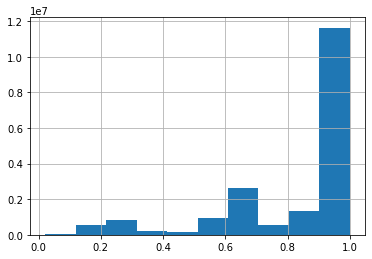

In [ ]:
user_edges['weight'].hist()

In [ ]:
user_edges['weight'].describe()

count    1.894407e+07
mean     8.143841e-01
std      2.196556e-01
min      2.216298e-02
25%      6.792290e-01
50%      9.278536e-01
75%      9.579982e-01
max      1.000000e+00
Name: weight, dtype: float64

In [ ]:
#convert matrix to list of edges and rename the columns
book_edges = book_sim_df.stack().reset_index()
book_edges.columns = ['source','target','weight']

#remove self correlations
book_edges = book_edges.loc[book_edges['source'] != book_edges['target']].copy()

#show the first 5 rows of the edge list dataframe.
book_edges

,source,target,weight
1,0,1,0.857655
2,0,2,0.865800
3,0,3,0.867404
4,0,4,0.869347
5,0,5,0.865044
...,...,...,...
4665594,2159,2154,0.864896
4665595,2159,2155,0.871671
4665596,2159,2156,0.874233
4665597,2159,2157,0.852414


<AxesSubplot:>

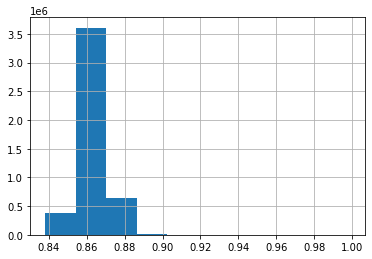

In [ ]:
book_edges['weight'].hist()

In [ ]:
book_edges['weight'].describe()

count    4.663440e+06
mean     8.632466e-01
std      7.035374e-03
min      8.382048e-01
25%      8.584626e-01
50%      8.627736e-01
75%      8.674405e-01
max      9.987618e-01
Name: weight, dtype: float64

Name: 
Type: Graph
Number of nodes: 4353
Number of edges: 9472037
Average degree: 4351.9582


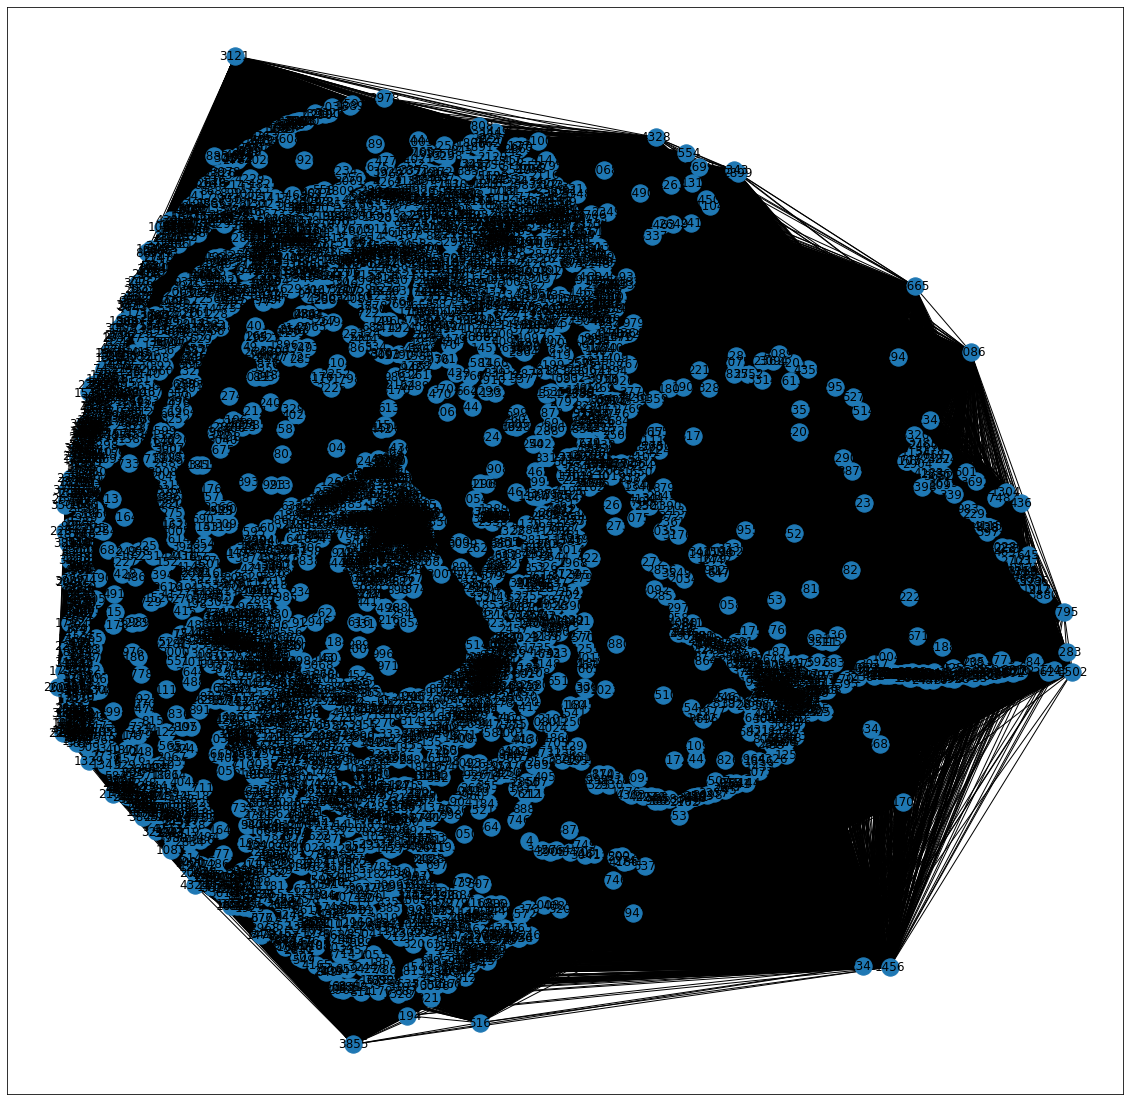

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

g = nx.from_pandas_edgelist(user_edges, "source","target",edge_attr="weight")
print(nx.info(g))
nx.Graph()
plt.figure(figsize=(20, 20))
nx.draw_networkx(g)
plt.show()

Name: 
Type: Graph
Number of nodes: 2160
Number of edges: 2331720
Average degree: 2159.0000


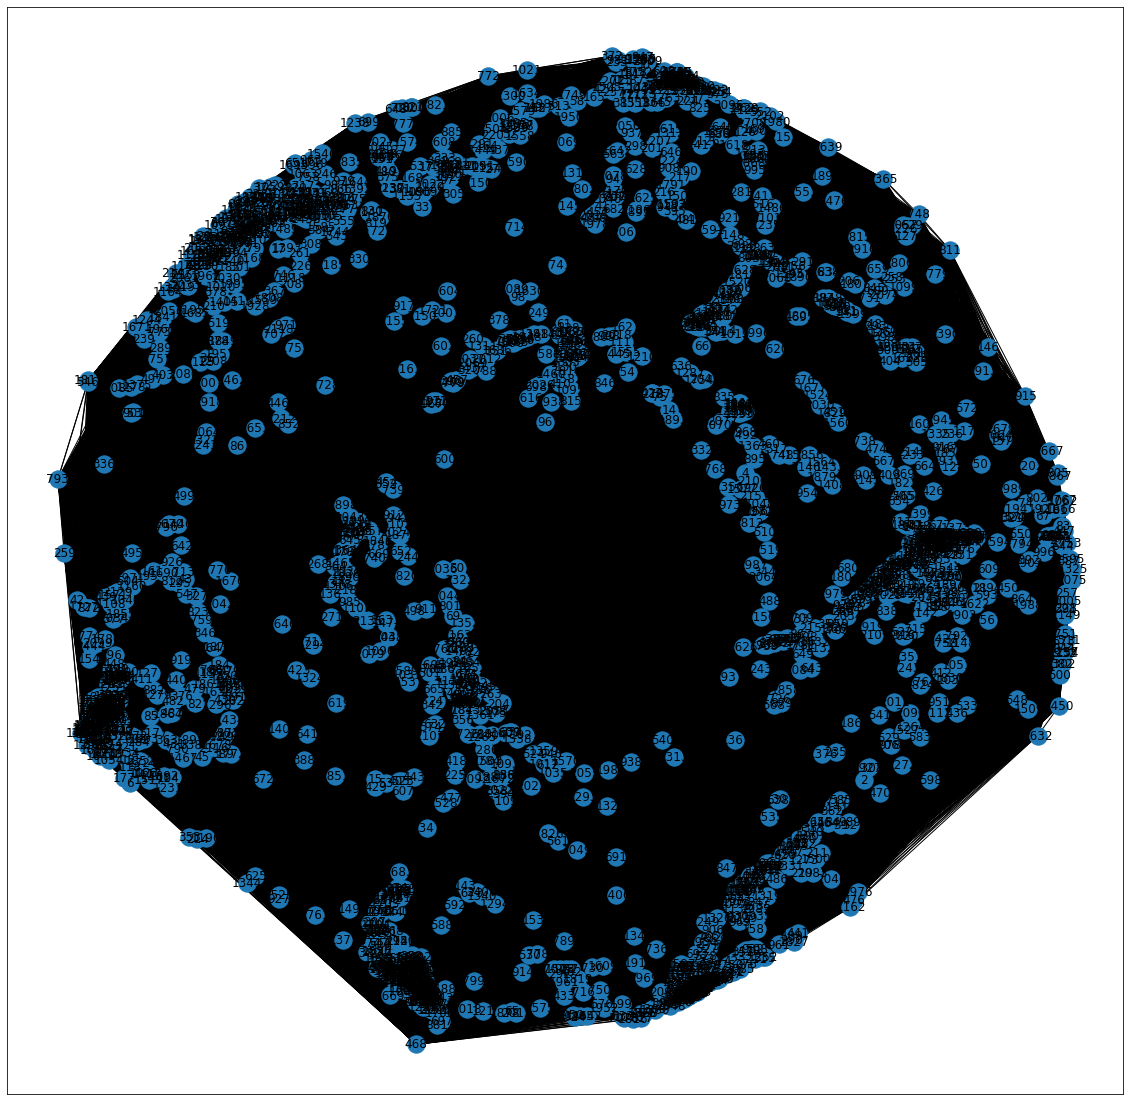

In [ ]:
b_g = nx.from_pandas_edgelist(book_edges,"source","target",edge_attr="weight")
print(nx.info(b_g))
nx.Graph()
plt.figure(figsize=(20, 20))
nx.draw_networkx(b_g)
plt.show()

## **Weighted Node2Vec**

https://stellargraph.readthedocs.io/en/stable/demos/node-classification/node2vec-weighted-node-classification.html#Introduction

In [ ]:
!pip install -q stellargraph[demos]==1.2.1

In [ ]:
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import preprocessing

import numpy as np

from stellargraph.data import BiasedRandomWalk
from stellargraph import StellarGraph

from gensim.models import Word2Vec

import warnings
import collections
from stellargraph import datasets
from IPython.display import display, HTML
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
walk_length = 100  # maximum length of a random walk to use throughout this notebook

In [ ]:
sg_user = StellarGraph(edges=user_edges)
print(sg_user.info())

StellarGraph: Undirected multigraph
 Nodes: 4353, Edges: 18944074

 Node types:
  default: [4353]
    Features: none
    Edge types: default-default->default

 Edge types:
    default-default->default: [18944074]
        Weights: range=[0.022163, 1], mean=0.814384, std=0.219656
        Features: none


In [ ]:
sg_book = StellarGraph(edges=book_edges)
print(sg_book.info())

StellarGraph: Undirected multigraph
 Nodes: 2160, Edges: 4663440

 Node types:
  default: [2160]
    Features: none
    Edge types: default-default->default

 Edge types:
    default-default->default: [4663440]
        Weights: range=[0.838205, 0.998762], mean=0.863247, std=0.00703537
        Features: none


In [ ]:
user_rw = BiasedRandomWalk(sg_user)

In [ ]:
weighted_walks = user_rw.run(
    nodes=sg_user.nodes(),  # root nodes
    length=walk_length,  # maximum length of a random walk
    n=10,  # number of random walks per root node
    p=0.5,  # Defines (unormalised) probability, 1/p, of returning to source node
    q=2.0,  # Defines (unormalised) probability, 1/q, for moving away from source node
    weighted=True,  # for weighted random walks
    seed=42,  # random seed fixed for reproducibility
)
print("Number of random walks: {}".format(len(weighted_walks)))

Number of random walks: 43530


In [ ]:
usr_weighted_model = Word2Vec(
    weighted_walks, window=5, min_count=0, sg=1, workers=1, vector_size=9
)

In [ ]:
len(usr_weighted_model.wv)

4353

In [ ]:
book_rw = BiasedRandomWalk(sg_book)

In [ ]:
book_weighted_walks = book_rw.run(
    nodes=sg_book.nodes(),  # root nodes
    length=walk_length,  # maximum length of a random walk
    n=10,  # number of random walks per root node
    p=0.5,  # Defines (unormalised) probability, 1/p, of returning to source node
    q=2.0,  # Defines (unormalised) probability, 1/q, for moving away from source node
    weighted=True,  # for weighted random walks
    seed=42,  # random seed fixed for reproducibility
)
print("Number of random walks: {}".format(len(book_weighted_walks)))

Number of random walks: 21600


In [ ]:
book_weighted_model = Word2Vec(
    book_weighted_walks, window=5, min_count=0, sg=1, workers=1, vector_size=9
)

In [ ]:
len(book_weighted_model.wv)

2160

In [ ]:
usr_graph_emb = pd.DataFrame(columns=[str(i) for i in range(9)])

for i, emb in enumerate(usr_weighted_model.wv):
    usr_graph_emb.loc[i] = list(emb)

In [ ]:
usr_graph_emb

,0,1,2,3,4,5,6,7,8
0,0.096043,-0.222639,-0.630284,-0.427117,0.274076,-0.164897,-0.427946,0.149861,-0.071340
1,-0.225967,0.036503,-0.185860,-0.705361,-0.138078,-0.136666,-0.203968,0.310464,-0.217147
2,-0.215099,0.216736,-0.282037,-0.456454,-0.037797,-0.178471,-0.311003,0.348404,-0.224396
3,-0.018192,0.146267,-0.266490,-0.642215,-0.083852,-0.155816,-0.001891,0.320202,-0.445860
4,-0.106636,0.170832,-0.256483,-0.478175,-0.251296,-0.294843,-0.146284,0.449546,-0.116491
...,...,...,...,...,...,...,...,...,...
4348,-0.099699,0.127034,-0.409770,-0.351188,0.005752,-0.236840,-0.231660,0.280074,-0.356808
4349,0.129404,0.178070,-0.210692,-0.475858,0.095767,-0.267802,-0.426185,0.337669,-0.188618
4350,-0.238119,0.025546,-0.982031,-0.086136,-0.182715,-0.709512,-0.644786,-0.226814,0.472851
4351,-0.079771,0.169950,-0.095496,-0.369103,0.134705,-0.433620,-0.429215,0.481524,-0.099440


In [ ]:
book_graph_emb = pd.DataFrame(columns=[str(i) for i in range(9)])

for i, emb in enumerate(book_weighted_model.wv):
    book_graph_emb.loc[i] = list(emb)

In [ ]:
book_graph_emb

,0,1,2,3,4,5,6,7,8
0,0.323233,-0.335111,0.107876,-0.261868,0.461640,0.245608,0.205518,0.311986,-0.095691
1,0.182405,-0.109832,0.195711,-0.289453,0.260611,0.272005,0.141007,0.570476,0.238474
2,0.149861,-0.032368,0.046019,-0.176608,0.393362,0.293374,0.252964,0.512474,-0.048588
3,0.361417,-0.233050,0.062647,-0.153420,0.275296,0.335040,0.136496,0.459510,-0.062403
4,0.273164,0.098208,0.152570,-0.010901,0.337163,0.219521,0.185108,0.616989,-0.182488
...,...,...,...,...,...,...,...,...,...
2155,0.431674,-0.039347,0.316875,0.054313,0.045983,0.090641,0.384597,0.553605,0.047339
2156,0.279270,-0.282384,0.263946,-0.123370,0.240656,0.356767,0.082954,0.451072,0.149752
2157,0.283955,-0.086056,0.264300,-0.171756,0.266977,0.333979,0.196044,0.438664,0.009408
2158,0.185902,-0.189861,0.127487,-0.178818,0.321097,0.164237,0.358226,0.463176,0.009550


In [ ]:
graph_emb = pd.concat([usr_graph_emb,book_graph_emb])
graph_emb.index = range(len(graph_emb))

graph_emb

,0,1,2,3,4,5,6,7,8
0,0.096043,-0.222639,-0.630284,-0.427117,0.274076,-0.164897,-0.427946,0.149861,-0.071340
1,-0.225967,0.036503,-0.185860,-0.705361,-0.138078,-0.136666,-0.203968,0.310464,-0.217147
2,-0.215099,0.216736,-0.282037,-0.456454,-0.037797,-0.178471,-0.311003,0.348404,-0.224396
3,-0.018192,0.146267,-0.266490,-0.642215,-0.083852,-0.155816,-0.001891,0.320202,-0.445860
4,-0.106636,0.170832,-0.256483,-0.478175,-0.251296,-0.294843,-0.146284,0.449546,-0.116491
...,...,...,...,...,...,...,...,...,...
6508,0.431674,-0.039347,0.316875,0.054313,0.045983,0.090641,0.384597,0.553605,0.047339
6509,0.279270,-0.282384,0.263946,-0.123370,0.240656,0.356767,0.082954,0.451072,0.149752
6510,0.283955,-0.086056,0.264300,-0.171756,0.266977,0.333979,0.196044,0.438664,0.009408
6511,0.185902,-0.189861,0.127487,-0.178818,0.321097,0.164237,0.358226,0.463176,0.009550


In [ ]:
graph_emb.to_csv('Feature_Vector/graph_vector.csv', index=None)

# **Graph Embedding2**

## **User Embedding**

### **Age 범주화**

In [ ]:
age_list = []
for i in list(Users['Age']):
  if i < 10:
    age_list.append('0-10')
  elif 10 <= i <20:
    age_list.append('10-20')
  elif 20 <= i <30:
    age_list.append('20-30')
  elif 30 <= i <40:
    age_list.append('30-40')
  elif 40 <= i <50:
    age_list.append('40-50')
  elif 50 <= i <60:
    age_list.append('50-60')
  elif 60 <= i <70:
    age_list.append('60-70')
  elif 70 <= i <80:
    age_list.append('70-80')
  elif 80 <= i <90:
    age_list.append('80-90')
  elif 90 <= i:
    age_list.append('over 90')

In [ ]:
Users['age_label'] = age_list

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Users

,User-ID,Location,Age,age_label
0,242,"neuffen,baden-wuerttemberg,germany",37.0,30-40
1,254,"minneapolis,minnesota,usa",24.0,20-30
2,388,"nashville,tennessee,usa",35.0,30-40
3,503,"el centro,california,usa",40.0,40-50
4,505,"washington,dc,usa",51.0,50-60
...,...,...,...,...
4348,278356,"lakeland,tennessee,usa",57.0,50-60
4349,278390,"elburn,illinois,usa",35.0,30-40
4350,278554,"takasaki,gunma,japan",22.0,20-30
4351,278843,"pismo beach,california,usa",28.0,20-30


In [ ]:
Users['age_label'].value_counts()

30-40      1409
20-30      1274
40-50       761
50-60       449
10-20       235
60-70       147
70-80        30
0-10         26
over 90      16
80-90         6
Name: age_label, dtype: int64

### **Location 도시로 범주화**

In [ ]:
loc_df = pd.DataFrame([i.split(',') for i in list(Users['Location'])])
loc_df

,0,1,2,3,4
0,neuffen,baden-wuerttemberg,germany,None,None
1,minneapolis,minnesota,usa,None,None
2,nashville,tennessee,usa,None,None
3,el centro,california,usa,None,None
4,washington,dc,usa,None,None
...,...,...,...,...,...
4348,lakeland,tennessee,usa,None,None
4349,elburn,illinois,usa,None,None
4350,takasaki,gunma,japan,None,None
4351,pismo beach,california,usa,None,None


In [ ]:
loc_df.isnull().sum()

0       0
1       2
2     144
3    4339
4    4352
dtype: int64

In [ ]:
Users['city'] = loc_df[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Users

,User-ID,Location,Age,age_label,city
0,242,"neuffen,baden-wuerttemberg,germany",37.0,30-40,neuffen
1,254,"minneapolis,minnesota,usa",24.0,20-30,minneapolis
2,388,"nashville,tennessee,usa",35.0,30-40,nashville
3,503,"el centro,california,usa",40.0,40-50,el centro
4,505,"washington,dc,usa",51.0,50-60,washington
...,...,...,...,...,...
4348,278356,"lakeland,tennessee,usa",57.0,50-60,lakeland
4349,278390,"elburn,illinois,usa",35.0,30-40,elburn
4350,278554,"takasaki,gunma,japan",22.0,20-30,takasaki
4351,278843,"pismo beach,california,usa",28.0,20-30,pismo beach


In [ ]:
G_user = Users[['User-ID','age_label','city']]
G_user

,User-ID,age_label,city
0,242,30-40,neuffen
1,254,20-30,minneapolis
2,388,30-40,nashville
3,503,40-50,el centro
4,505,50-60,washington
...,...,...,...
4348,278356,50-60,lakeland
4349,278390,30-40,elburn
4350,278554,20-30,takasaki
4351,278843,20-30,pismo beach


### **Node2Vec**

In [ ]:
pip install node2vec

  Created wheel for node2vec: filename=node2vec-0.4.3-py3-none-any.whl size=5978 sha256=8c14ffe3676c70c192a04819072db1dfabf8b4fdc6d49858cc88732d8de41c2a
  Stored in directory: /root/.cache/pip/wheels/07/62/78/5202cb8c03cbf1593b48a8a442fca8ceec2a8c80e22318bae9
Successfully built node2vec


In [ ]:
import networkx as nx

G=nx.Graph()
G.add_nodes_from([str(i) for i in list(G_user['User-ID'])])
G.add_nodes_from(list(G_user['age_label']))
G.add_nodes_from(list(G_user['city']))
G.add_edges_from([(i,j) for i,j in zip([str(i) for i in list(G_user['User-ID'])], list(G_user['age_label']))])
G.add_edges_from([(i,j) for i,j in zip([str(i) for i in list(G_user['User-ID'])], list(G_user['city']))])

In [ ]:
from node2vec import Node2Vec

node2vec = Node2Vec(graph=G, # target graph
                    dimensions=9, # embedding dimension
                    walk_length=5, # number of nodes in each walks
                    p = 1, # return hyper parameter
                    q = 0.0001, # inout parameter, q값을 작게 하면 structural equivalence를 강조하는 형태로 학습됩니다.
                    weight_key=None, # if weight_key in attrdict
                    num_walks=100,
                    workers=1,
                   )

Computing transition probabilities:   0%|          | 0/6479 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 100/100 [03:05<00:00,  1.86s/it]


In [ ]:
for i, each_walk in enumerate(node2vec.walks):
    print(f"{i:0>2d}, {each_walk}")
    if i>1:
        break

00, ['78901', '30-40', '33816', 'richmond hill', '32569']
01, ['santa barbara', '155807', '50-60', '270838', 'rosemead']
02, ['michie', '28591', '30-40', '224897', 'lyon']


In [ ]:
model1 = node2vec.fit(window=2)

In [ ]:
n2v_dict = {}
for i,j in zip(model1.wv.index2entity,model1.wv.vectors):
  if i in [str(i) for i in list(G_user['User-ID'])]:
    n2v_dict[i]=j

In [ ]:
G_user['n2v']=[n2v_dict[i] for i in [str(i) for i in list(G_user['User-ID'])]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
G_user

,User-ID,age_label,city,n2v
0,242,30-40,neuffen,"[0.6610432, -0.5147494, -0.4791658, 1.7086359,..."
1,254,20-30,minneapolis,"[-0.941548, 1.0836862, 1.2354442, 0.32187903, ..."
2,388,30-40,nashville,"[0.9495841, 0.4108859, -0.7261736, 0.5527474, ..."
3,503,40-50,el centro,"[1.7479429, 0.94654256, 0.38204134, -0.0634528..."
4,505,50-60,washington,"[0.9730155, -0.9660428, 1.9110937, 2.5189438, ..."
...,...,...,...,...
4348,278356,50-60,lakeland,"[-0.7836141, -0.2712662, 1.8505821, 2.5542178,..."
4349,278390,30-40,elburn,"[1.1703818, -0.36464912, -0.41170973, 1.529365..."
4350,278554,20-30,takasaki,"[-0.4645842, 2.1399455, 1.8933841, 0.4927004, ..."
4351,278843,20-30,pismo beach,"[0.010294798, 1.3849992, 2.028488, 0.016813764..."


## **Book Embedding**

### **출판년도 범주화**

In [ ]:
year_list = []
for i in [int(j) for j in list(Books['Year-Of-Publication'])]:
  if i < 1970:
    year_list.append('under 1970')
  elif 1970 <= i <1980:
    year_list.append('1970-80')
  elif 1980 <= i <1990:
    year_list.append('1980-90')
  elif 1990 <= i <2000:
    year_list.append('1990-2000')
  elif 2000 <= i <2010:
    year_list.append('2000-10')
  elif 2010 <= i <2020:
    year_list.append('2010-20')
  elif 2020 <= i:
    year_list.append('over 2020')

In [ ]:
Books['year_label'] = year_list

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Books['year_label'].value_counts()

1990-2000     1021
2000-10        891
1980-90        203
1970-80         28
under 1970      17
Name: year_label, dtype: int64

### **Node2Vec**

In [ ]:
G_book = Books[['ISBN','Book-Author','Publisher','year_label']]

In [ ]:
G=nx.Graph()
G.add_nodes_from(list(G_book['ISBN']))
G.add_nodes_from(list(G_book['Book-Author']))
G.add_nodes_from(list(G_book['Publisher']))
G.add_nodes_from(list(G_book['year_label']))
G.add_edges_from([(i,j) for i,j in zip(list(G_book['ISBN']), list(G_book['Book-Author']))])
G.add_edges_from([(i,j) for i,j in zip(list(G_book['ISBN']), list(G_book['Publisher']))])
G.add_edges_from([(i,j) for i,j in zip(list(G_book['ISBN']), list(G_book['year_label']))])

In [ ]:
node2vec = Node2Vec(graph=G, # target graph
                    dimensions=9, # embedding dimension
                    walk_length=5, # number of nodes in each walks
                    p = 1, # return hyper parameter
                    q = 0.0001, # inout parameter, q값을 작게 하면 structural equivalence를 강조하는 형태로 학습됩니다.
                    weight_key=None, # if weight_key in attrdict
                    num_walks=100,
                    workers=1,
                   )

Computing transition probabilities:   0%|          | 0/3224 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 100/100 [01:21<00:00,  1.23it/s]


In [ ]:
for i, each_walk in enumerate(node2vec.walks):
    print(f"{i:0>2d}, {each_walk}")
    if i>1:
        break

00, ['0446527033', 'Warner Books', '0446527165', 'David Baldacci', '0446611778']
01, ['0671027360', 'Dan Brown', '0671027387', '2000-10', '0515137111']
02, ['Bret Easton Ellis', '0679735771', '2000-10', '0312289723', "St. Martin's Press"]


In [ ]:
model2 = node2vec.fit(window=2)

In [ ]:
n2v_dict = {}
for i,j in zip(model2.wv.index2entity,model2.wv.vectors):
  if i in list(G_book['ISBN']):
    n2v_dict[i]=j

In [ ]:
G_book['n2v']=[n2v_dict[i] for i in list(G_book['ISBN'])]
G_book

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ISBN,Book-Author,Publisher,year_label,n2v
0,0440234743,John Grisham,Dell,1990-2000,"[-1.5792876, 1.1622707, -0.09166485, -1.285064..."
1,0452264464,Toni Morrison,Plume,1990-2000,"[-0.5866537, 2.747076, 1.2079735, -0.03929615,..."
2,0971880107,Rich Shapero,Too Far,2000-10,"[1.3109419, 0.016876152, 1.8609834, -1.00601, ..."
3,0345402871,Michael Crichton,Ballantine Books,1990-2000,"[0.6229821, 0.8347782, -0.73994815, -0.0421496..."
4,0345417623,MICHAEL CRICHTON,Ballantine Books,2000-10,"[0.12481216, -0.1804899, -0.9909337, 0.0913028..."
...,...,...,...,...,...
2155,0553287346,Elizabeth George,Bantam Books,1990-2000,"[-0.1493391, 1.0088989, -0.3960819, -1.3243423..."
2156,0399152288,Sue Grafton,Putnam Publishing Group,2000-10,"[-0.6927059, -0.5573324, 0.053444184, -1.80501..."
2157,0439425220,J. K. Rowling,Scholastic,2000-10,"[-1.13459, 0.2814959, 1.2158275, -0.1286306, -..."
2158,1551668017,Susan Wiggs,Mira,2000-10,"[-0.07083709, -0.336741, 1.5960338, -0.3325404..."
